In [105]:
import pandas as pd

# Load the dataset
df = pd.read_csv('final_dataset_encoded.csv', low_memory=False)

# Split data by academic year
df_2021 = df[df['academicYear'] == 2021]
df_2022 = df[df['academicYear'] == 2022]

# Find common ids between the two years
common_ids = set(df_2021['idOSYM']).intersection(set(df_2022['idOSYM']))

# Convert to a list or back to a Series if needed
common_ids = list(common_ids)  # Or pd.Series(common_ids)

print(len(df_2022))
print(len(common_ids))


9250
8632


## Lag Features

In [ ]:
df['lag_baseRanking'] = df.groupby(['universityName_encoded', 'departmentName_encoded', 'scholarshipRate'])['baseRanking'].shift(1)
df['lag_baseRanking'] = df['lag_baseRanking'].fillna(df['baseRanking'])
df['lag_quota'] = df.groupby(['universityName_encoded', 'departmentName_encoded', 'scholarshipRate'])['quota'].shift(1)
df['lag_quota'] = df['lag_quota'].fillna(df['quota'])
df['lag_revenue'] = df.groupby(['universityName_encoded', 'departmentName_encoded', 'scholarshipRate'])['revenue'].shift(1)
df['lag_revenue'] = df['lag_revenue'].fillna(df['revenue'])

print(df.head())


   academicYear     idOSYM  scholarshipRate  quota  occupiedSlots  tuitionFee  \
0          2021  106510077              0.0     70             70         0.0   
1          2022  106510077              0.0     75             75         0.0   
2          2023  106510077              0.0     75             75         0.0   
3          2021  106510087              0.0     60             62         0.0   
4          2022  106510087              0.0     65             67         0.0   

   universityLocation  universityRegion  profCount  assoCount  ...  \
0                  41                 6        1.0        1.0  ...   
1                  41                 6        1.0        1.0  ...   
2                  41                 6        0.0        1.0  ...   
3                  41                 6        1.0        0.0  ...   
4                  41                 6        1.0        1.0  ...   

   language_Çince  language_İngilizce  language_İspanyolca  \
0               0             

## Year-over-Year Change Features

In [107]:
df['yoy_baseRanking'] = df['baseRanking'] - df['lag_baseRanking']
df['yoy_quota'] = df['quota'] - df['lag_quota']
df['yoy_revenue'] = df['revenue'] - df['lag_revenue']

print(df.head())


   academicYear     idOSYM  scholarshipRate  quota  occupiedSlots  tuitionFee  \
0          2021  106510077              0.0     70             70         0.0   
1          2022  106510077              0.0     75             75         0.0   
2          2023  106510077              0.0     75             75         0.0   
3          2021  106510087              0.0     60             62         0.0   
4          2022  106510087              0.0     65             67         0.0   

   universityLocation  universityRegion  profCount  assoCount  ...  \
0                  41                 6        1.0        1.0  ...   
1                  41                 6        1.0        1.0  ...   
2                  41                 6        0.0        1.0  ...   
3                  41                 6        1.0        0.0  ...   
4                  41                 6        1.0        1.0  ...   

   language_İtalyanca  universityName_encoded  departmentName_encoded  \
0                  

In [108]:
print(df.isnull().sum())

academicYear          0
idOSYM                0
scholarshipRate       0
quota                 0
occupiedSlots         0
                   ... 
lag_quota          9820
lag_revenue           0
yoy_baseRanking    9820
yoy_quota          9820
yoy_revenue           0
Length: 73, dtype: int64


## Economic Features and Trends

In [109]:
# Lagging economic features
df['lag_inflation'] = df.groupby('academicYear')['inflation_by_year'].shift(1)
df['lag_growth_rate'] = df.groupby('academicYear')['growth_by_year'].shift(1)
df['lag_base_salary'] = df.groupby('academicYear')['base_salary_by_year'].shift(1)

df['lag_inflation'] = df['lag_inflation'].fillna(df['inflation_by_year'])
df['lag_growth_rate'] = df['lag_growth_rate'].fillna(df['growth_by_year'])
df['lag_base_salary'] = df['lag_base_salary'].fillna(df['base_salary_by_year'])

# Inflation-adjusted features
df['real_tuition_fee'] = df['tuitionFee'] / (1 + df['inflation_by_year'] / 100)
df['real_base_salary'] = df['base_salary_by_year'] / (1 + df['inflation_by_year'] / 100)

# Ratios and trends
df['tuition_to_salary_ratio'] = df['tuitionFee'] / df['base_salary_by_year']
df['growth_to_inflation_ratio'] = df['growth_by_year'] / df['inflation_by_year']
df['inflation_trend'] = df['inflation_by_year'] - df['lag_inflation']

# print(df.head())
print(df.isnull().sum())

academicYear                 0
idOSYM                       0
scholarshipRate              0
quota                        0
occupiedSlots                0
                            ..
real_tuition_fee             0
real_base_salary             0
tuition_to_salary_ratio      0
growth_to_inflation_ratio    0
inflation_trend              3
Length: 81, dtype: int64


In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

binary_features = [
    'universityType_devlet', 'universityType_vakıf', 'programType_DİL', 'programType_EA', 
    'programType_SAY', 'programType_SÖZ', 'language_Almanca', 'language_Arapça', 'language_Bulgarca', 'language_English', 
    'language_Ermenice', 'language_Fransızca', 'language_Korece', 'language_Lehçe', 'language_Rusça', 'language_Turkish', 
    'language_Türkçe', 'language_Çince', 'language_İngilizce', 'language_İspanyolca', 'language_İtalyanca', 
    'academicYear', 'baseRanking' ,'idOSYM'
]
print(df[binary_features].describe().round(3))
print(len(binary_features))


       universityType_devlet  universityType_vakıf  programType_DİL  \
count              27687.000             27687.000        27687.000   
mean                   0.598                 0.402            0.051   
std                    0.490                 0.490            0.220   
min                    0.000                 0.000            0.000   
25%                    0.000                 0.000            0.000   
50%                    1.000                 0.000            0.000   
75%                    1.000                 1.000            0.000   
max                    1.000                 1.000            1.000   

       programType_EA  programType_SAY  programType_SÖZ  language_Almanca  \
count       27687.000        27687.000        27687.000         27687.000   
mean            0.320            0.456            0.173             0.004   
std             0.467            0.498            0.378             0.066   
min             0.000            0.000            0.

In [111]:

encoded_features = ['universityName_encoded', 'departmentName_encoded', 'facultyName_encoded']
print(df[encoded_features].describe().round(3))

numeric_features = []
for feature in df.columns:
    if feature not in binary_features:
        numeric_features.append(feature)
        
print(len(numeric_features))

       universityName_encoded  departmentName_encoded  facultyName_encoded
count               27687.000               27687.000            27687.000
mean                  266.489                 266.489              266.489
std                    83.229                 153.768              124.241
min                    40.175                   0.000                0.000
25%                   202.341                 142.345              159.310
50%                   274.235                 270.523              295.544
75%                   333.143                 396.597              325.321
max                   525.039                 969.993              767.799
57


In [112]:
skew_values = df[numeric_features].skew()

skew_features = skew_values[abs(skew_values) > 1.5].index.tolist()

print("Skewed Features:", skew_features)
print(len(skew_features))

continuous_features = [col for col in numeric_features if col not in skew_features]

print("Continous Features:", continuous_features)
print(len(continuous_features))

Skewed Features: ['quota', 'occupiedSlots', 'tuitionFee', 'profCount', 'assoCount', 'docCount', 'topRanking', 'stdDeviationStudents', 'revenue', 'totalPreference', 'top1PreferenceRatio', 'top9PreferenceRatio', 'top10AdmittedRatio', 'admittedGovPref', 'admittedPrivPref', 'admittedTotalPref', 'admittedTotalDepartmentPref', 'currentStudentCount', 'totalForeignStudents', 'lag_quota', 'lag_revenue', 'yoy_quota', 'yoy_revenue', 'real_tuition_fee', 'tuition_to_salary_ratio']
25
Continous Features: ['scholarshipRate', 'universityLocation', 'universityRegion', 'outOfCityStudentRate', 'sameRegionStudentRate', 'top3PreferenceRatio', 'avgOrderofPreference', 'avgAdmittedStudentPrefOrder', 'top1AdmittedRatio', 'top3AdmittedRatio', 'totalStudentNumber', 'Urap_Rank', 'Urap_Score', 'avg_monthly_income_group', 'Time_for_employment', 'employment_rate', 'base_salary_by_year', 'inflation_by_year', 'growth_by_year', 'avgAdmissionRanking', 'baseAdmissionRanking', 'universityName_encoded', 'departmentName_enc

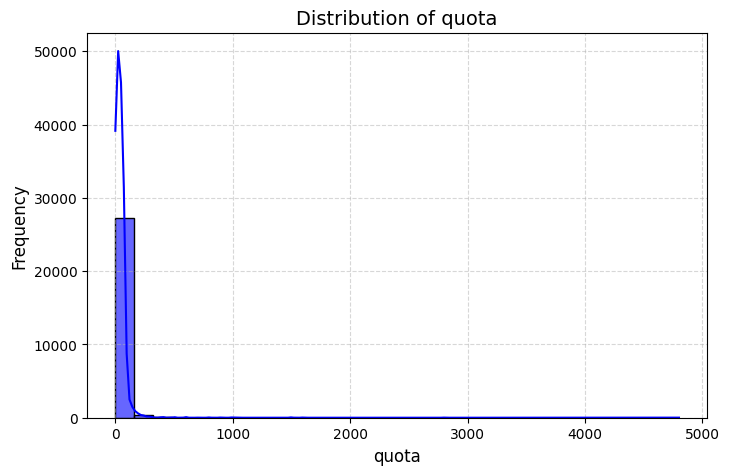

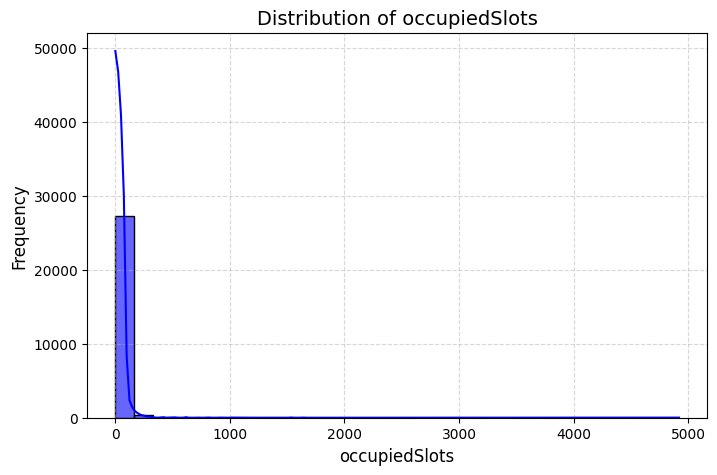

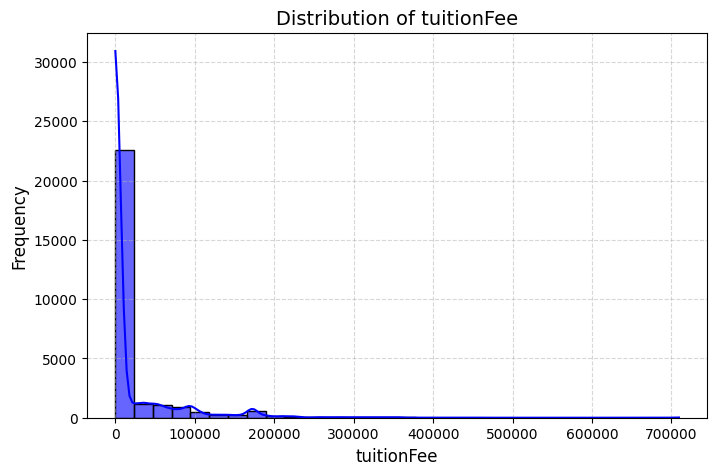

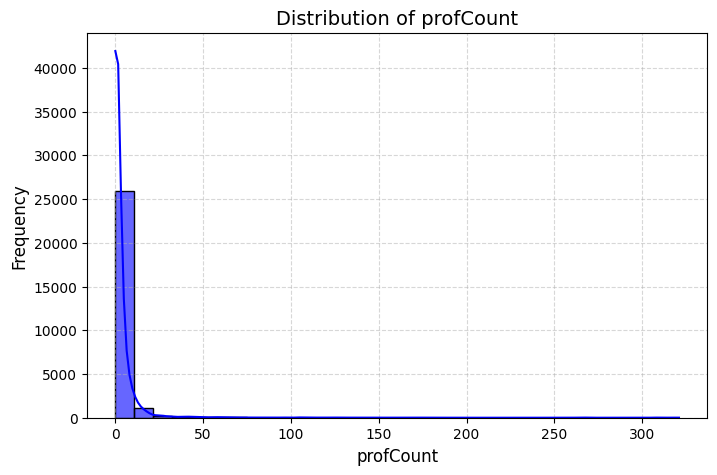

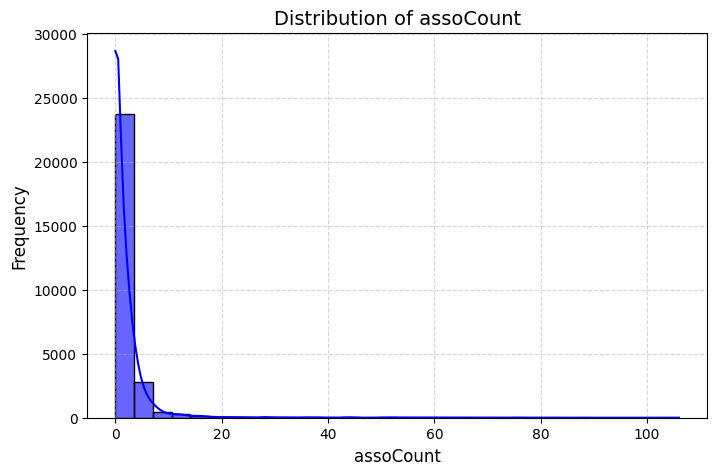

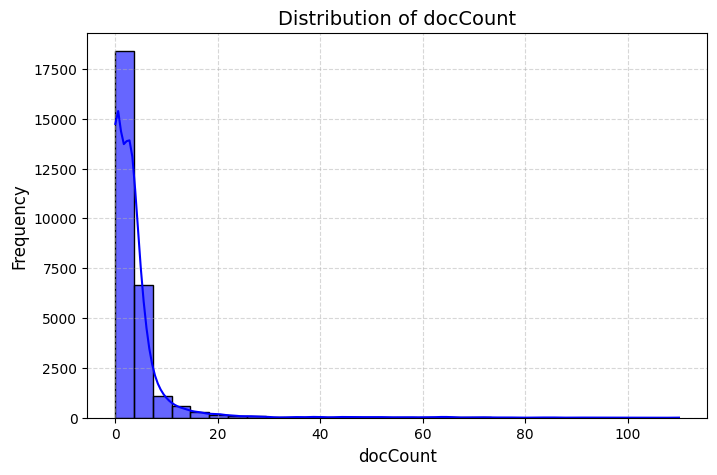

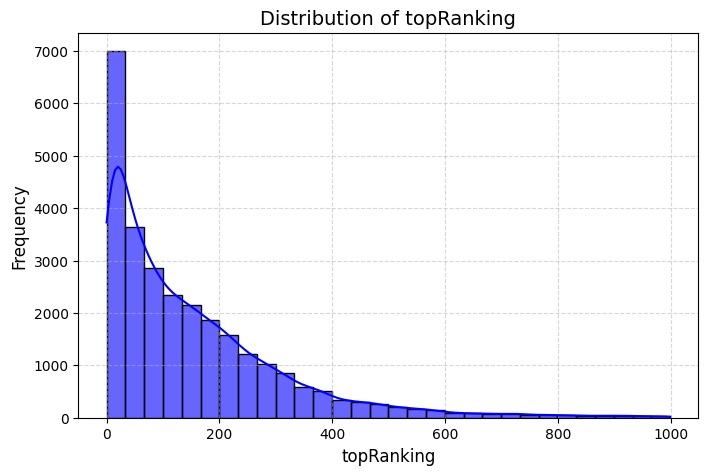

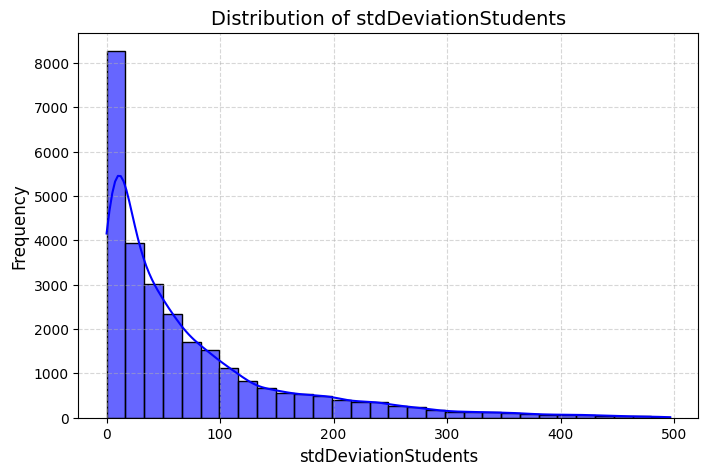

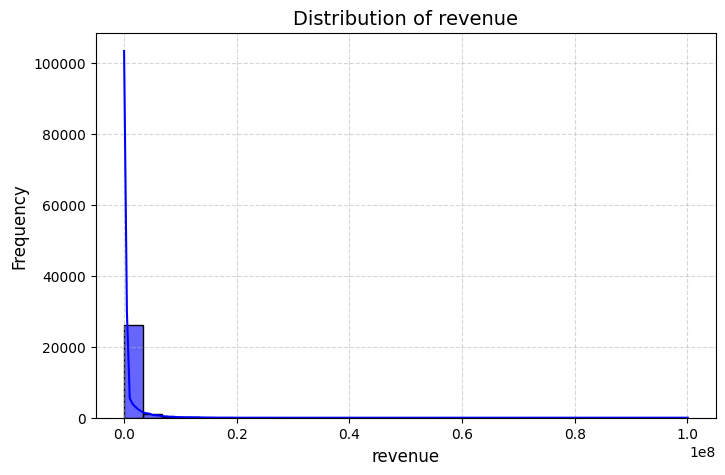

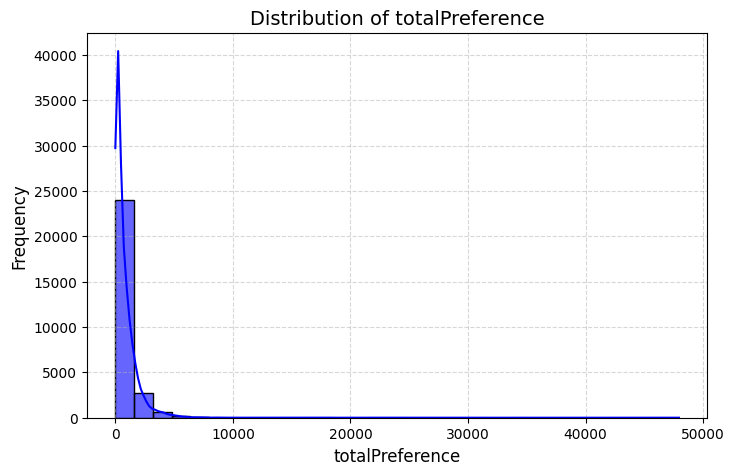

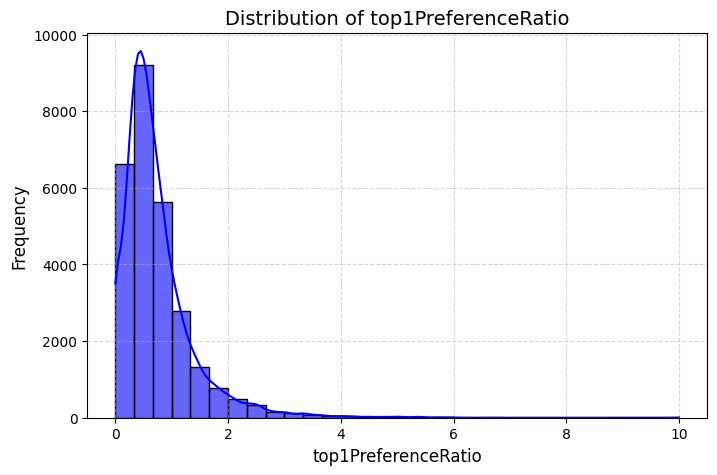

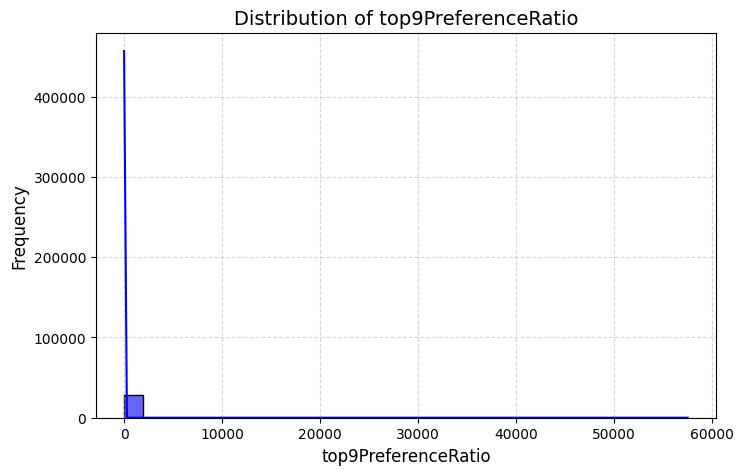

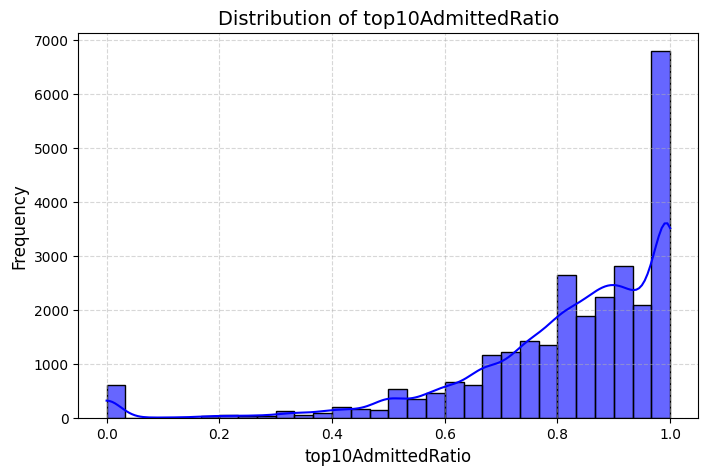

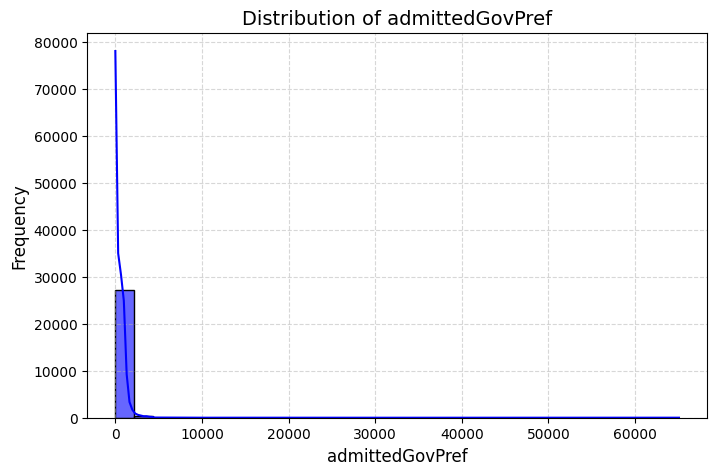

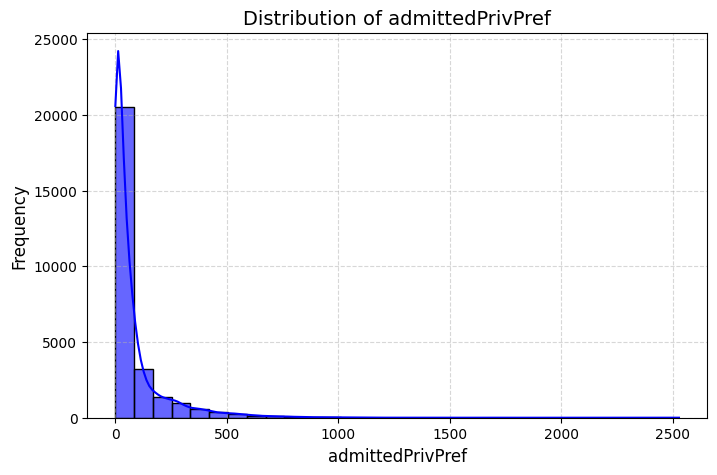

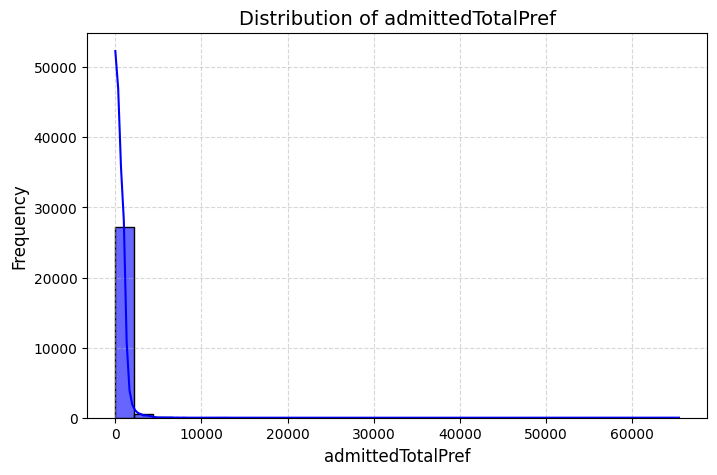

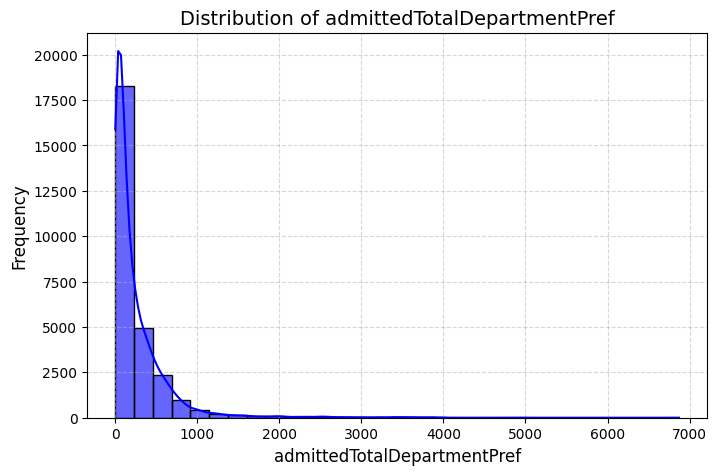

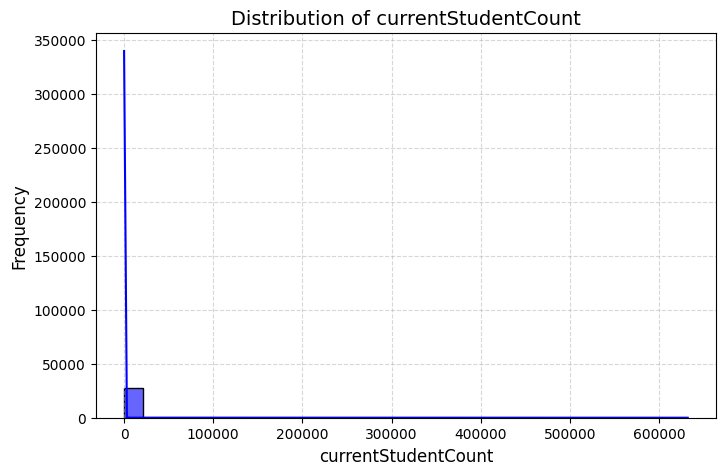

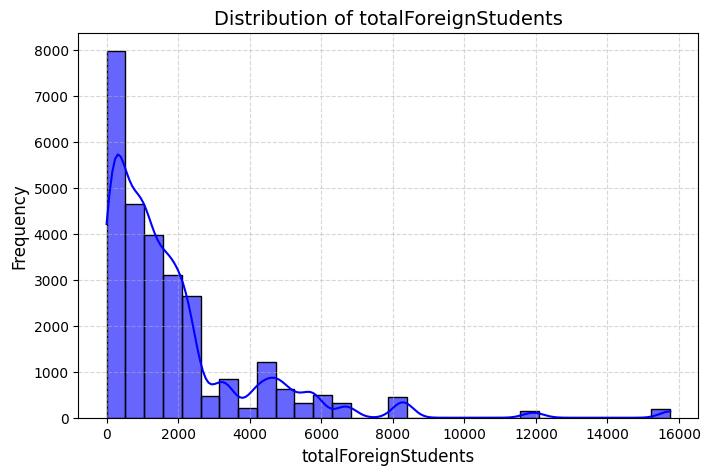

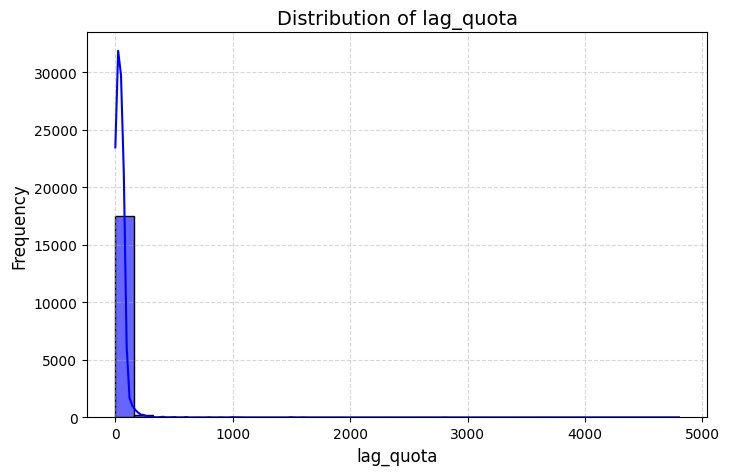

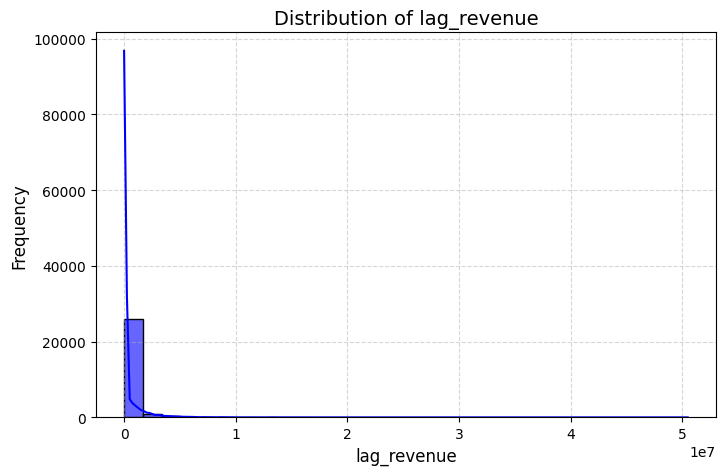

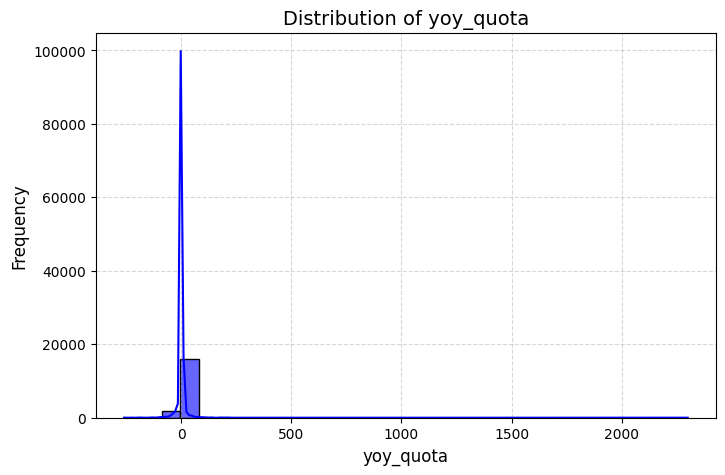

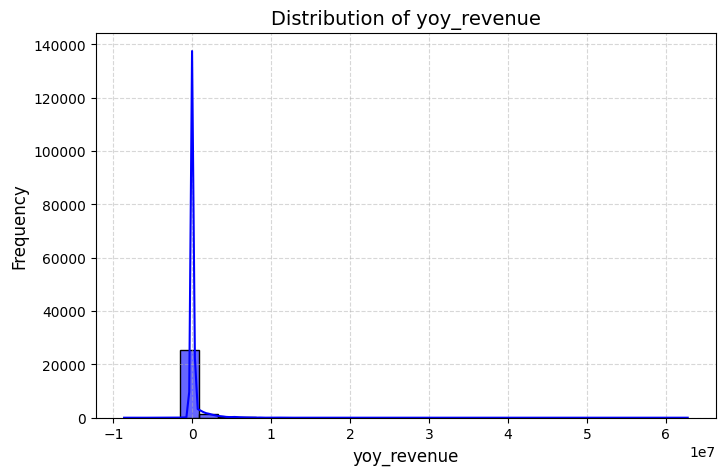

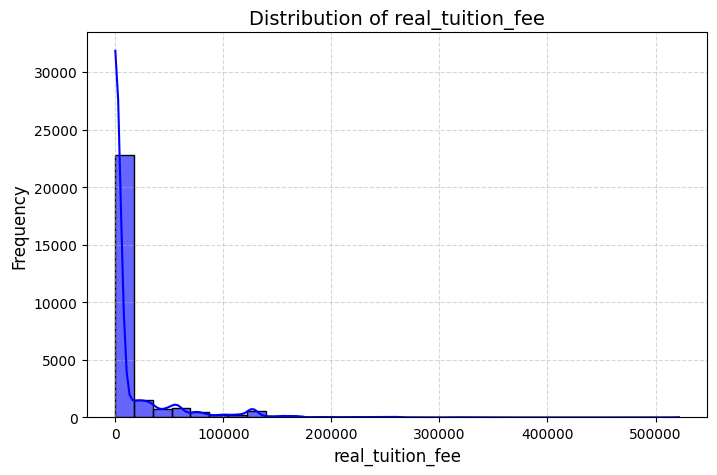

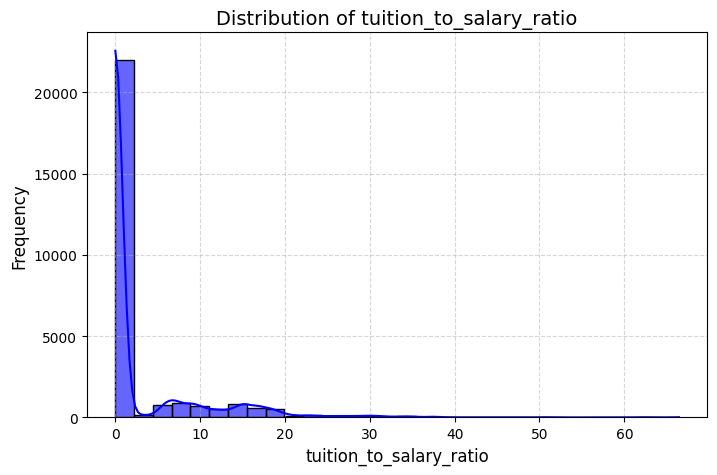

In [113]:
def plot_skewed_features(df, features):
    for feature in features:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[feature], kde=True, bins=30, color='blue', alpha=0.6)
        plt.title(f'Distribution of {feature}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()

plot_skewed_features(df, skew_features)

In [114]:
print(df.isnull().sum())

academicYear                 0
idOSYM                       0
scholarshipRate              0
quota                        0
occupiedSlots                0
                            ..
real_tuition_fee             0
real_base_salary             0
tuition_to_salary_ratio      0
growth_to_inflation_ratio    0
inflation_trend              3
Length: 81, dtype: int64


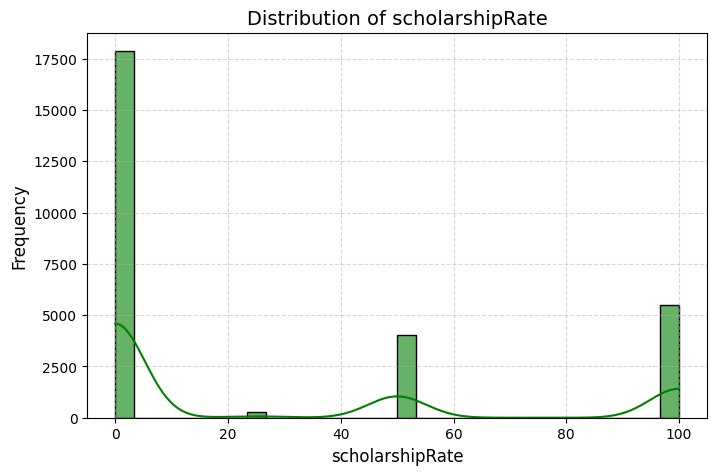

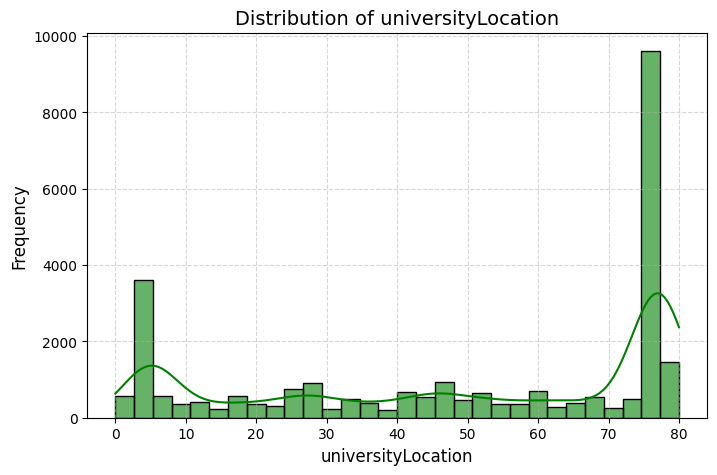

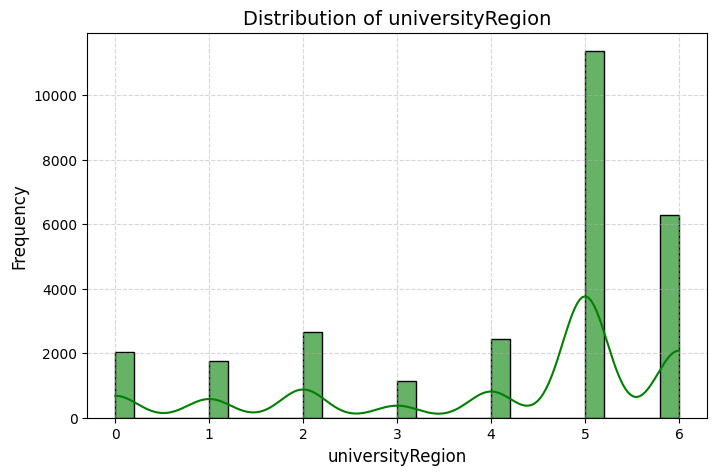

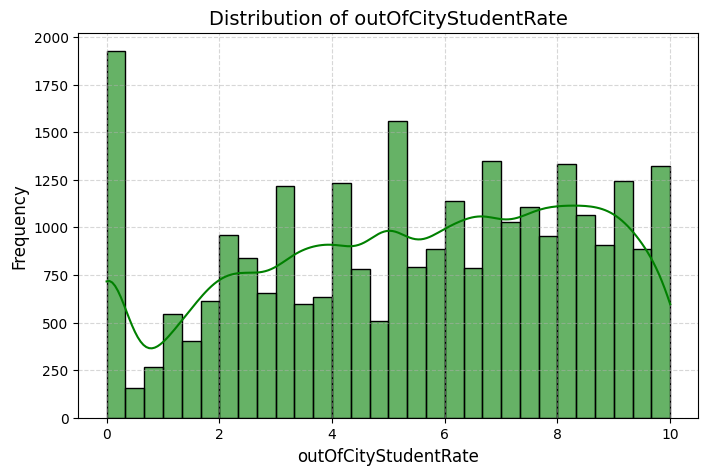

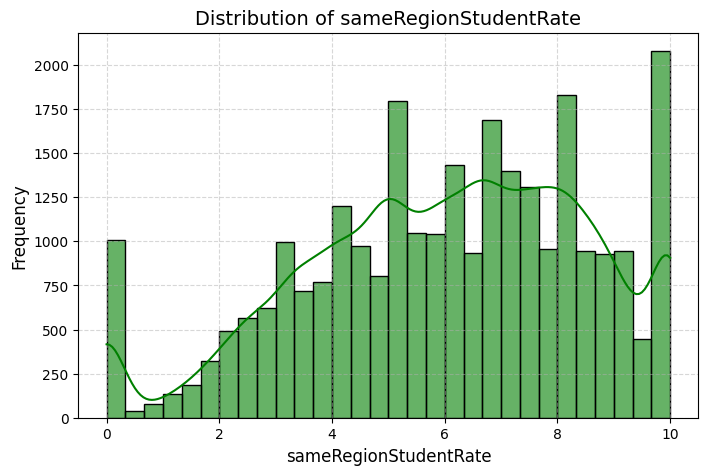

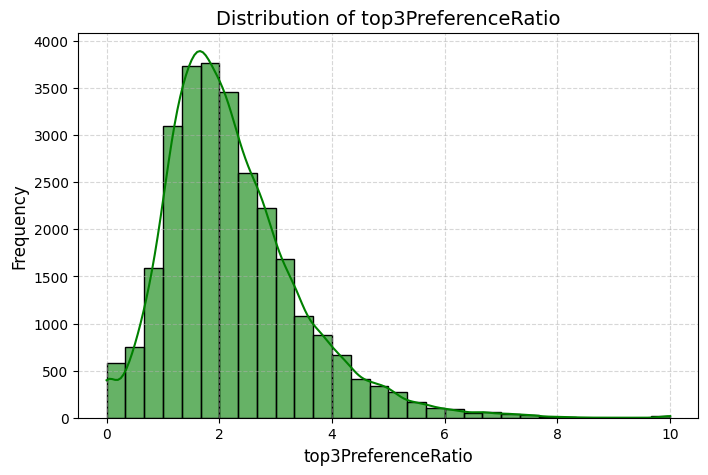

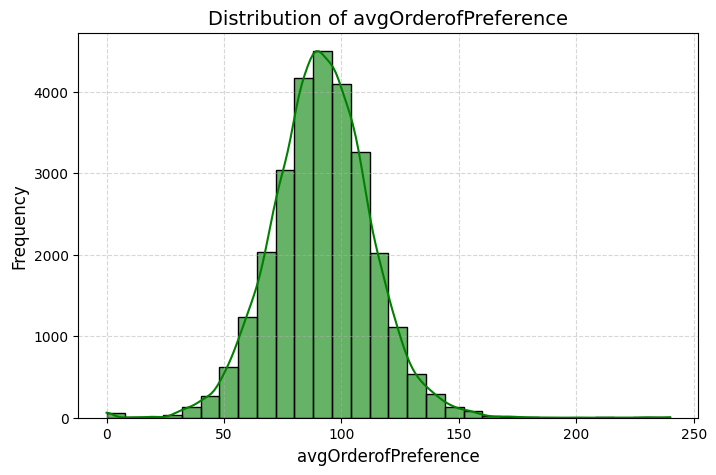

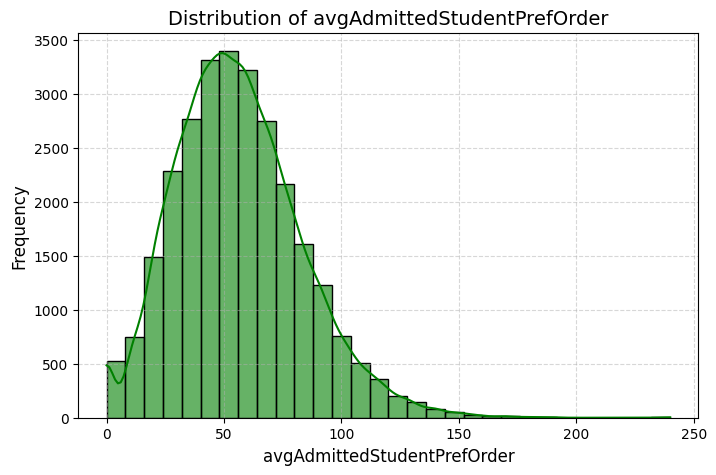

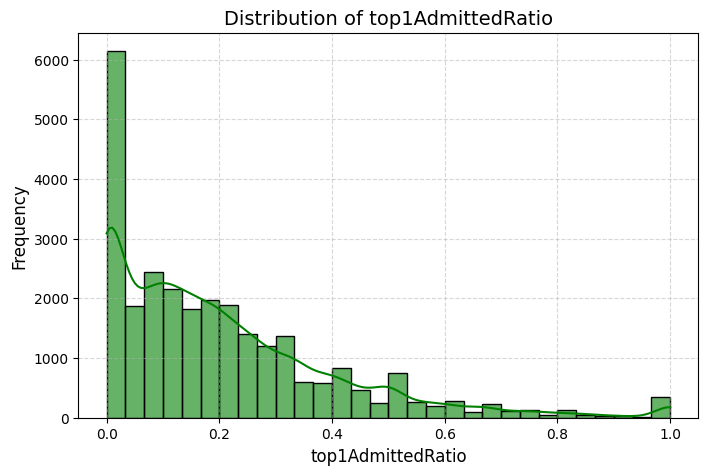

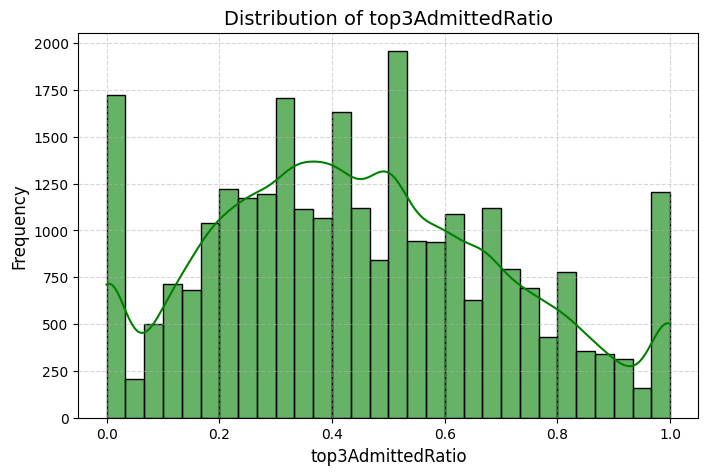

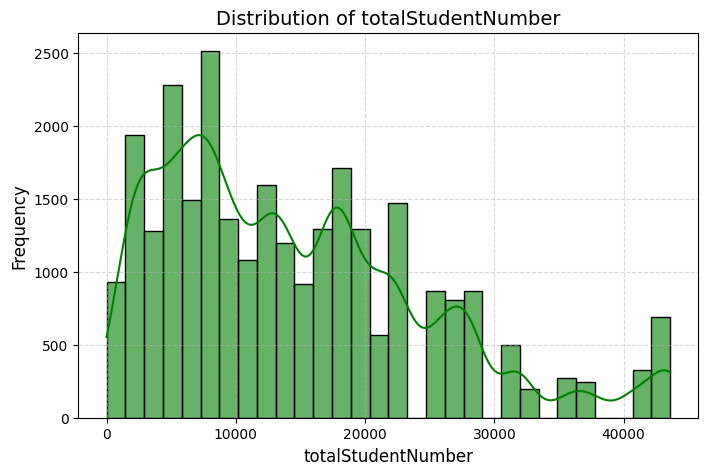

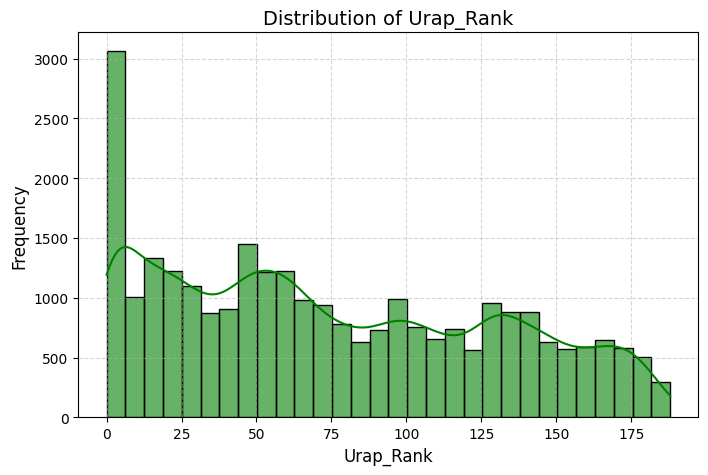

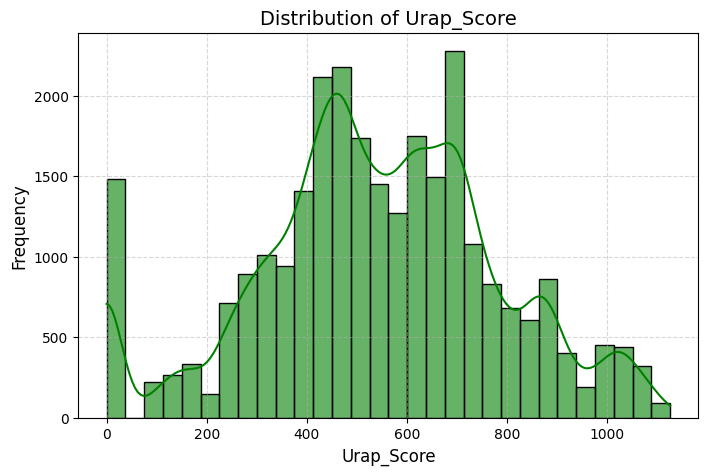

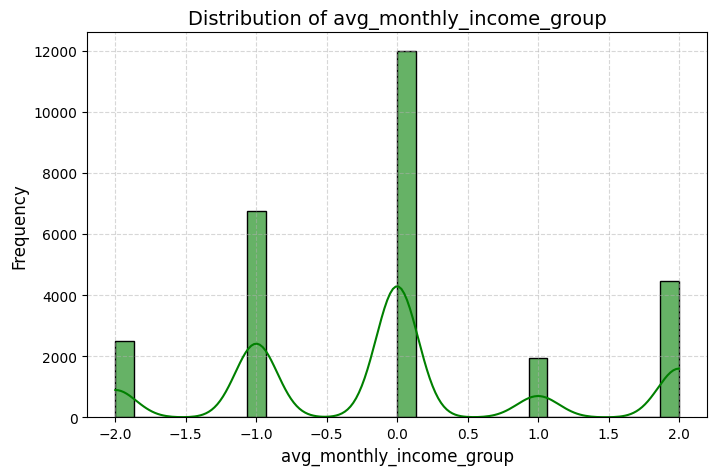

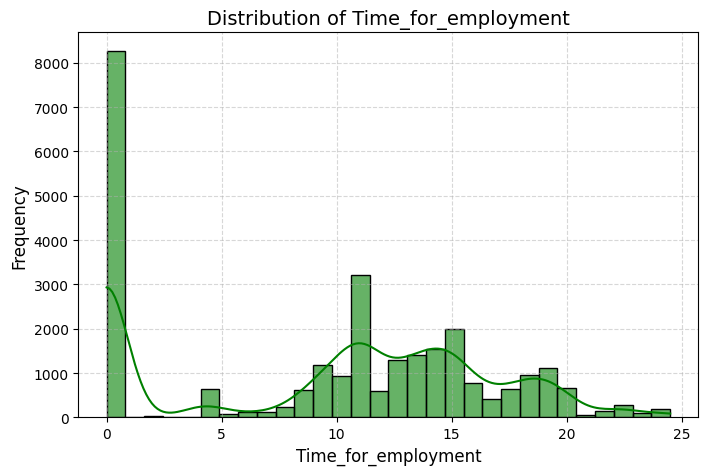

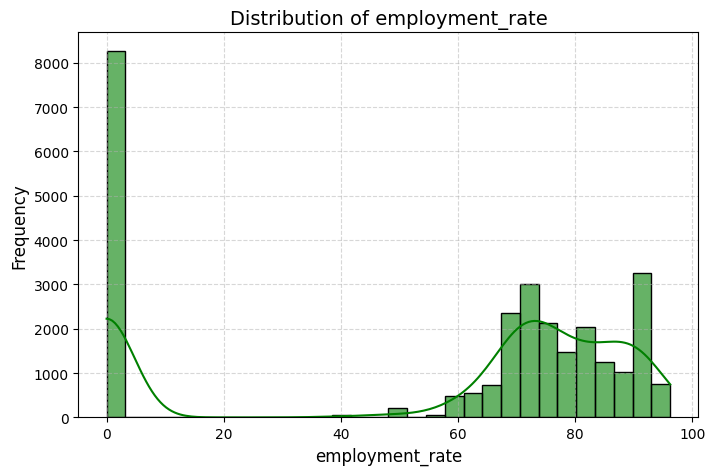

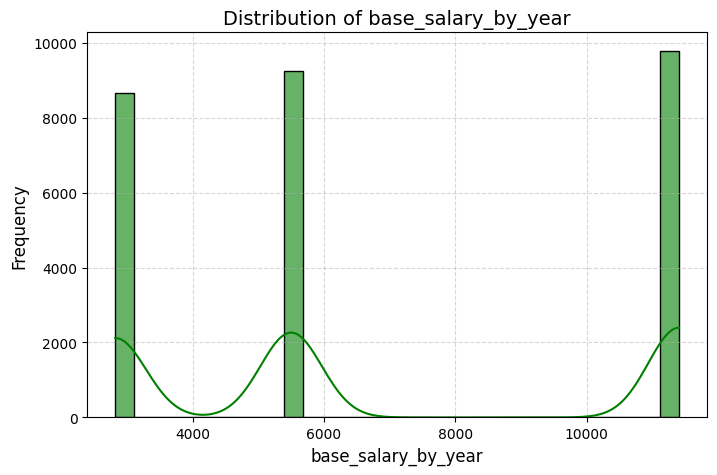

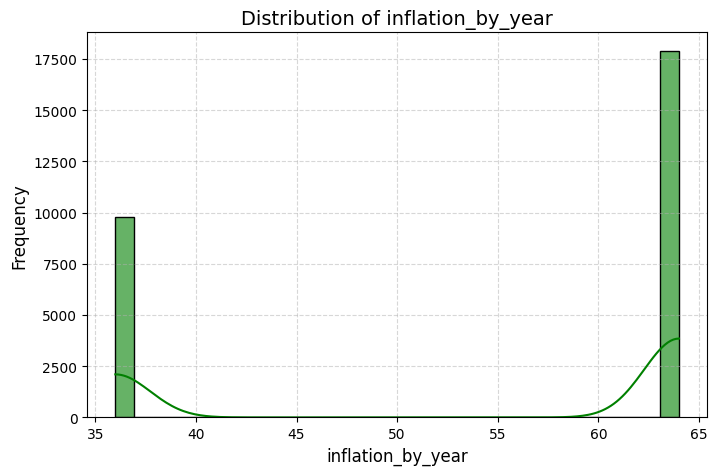

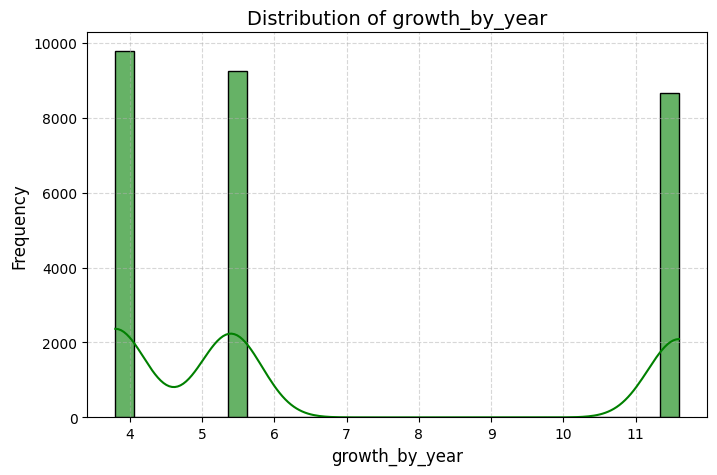

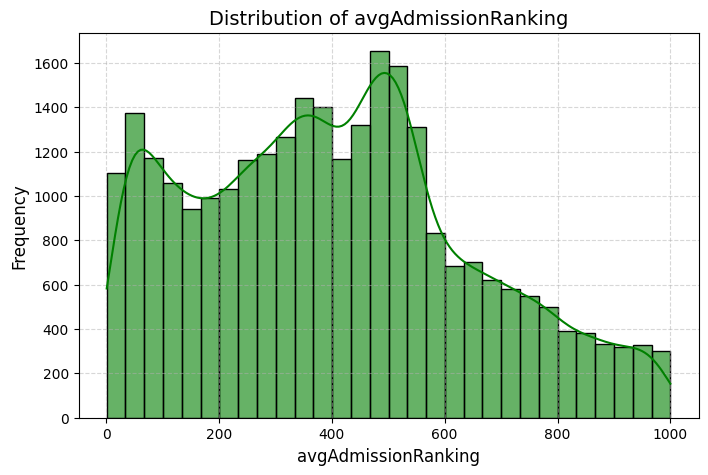

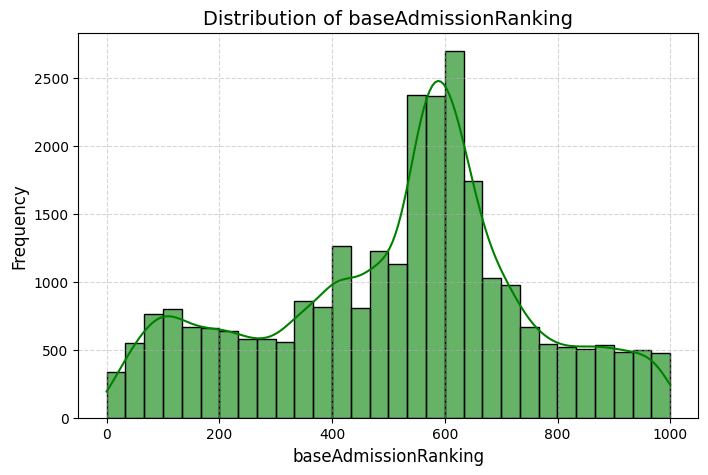

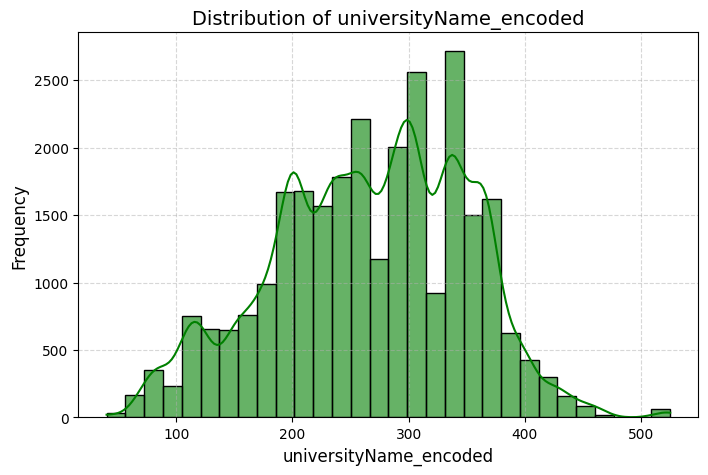

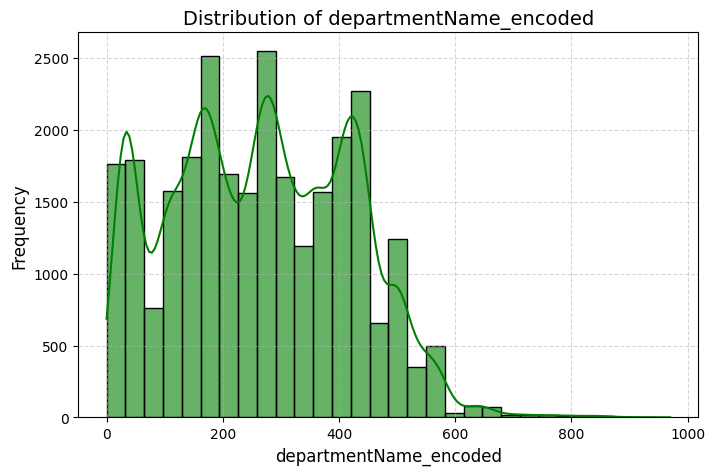

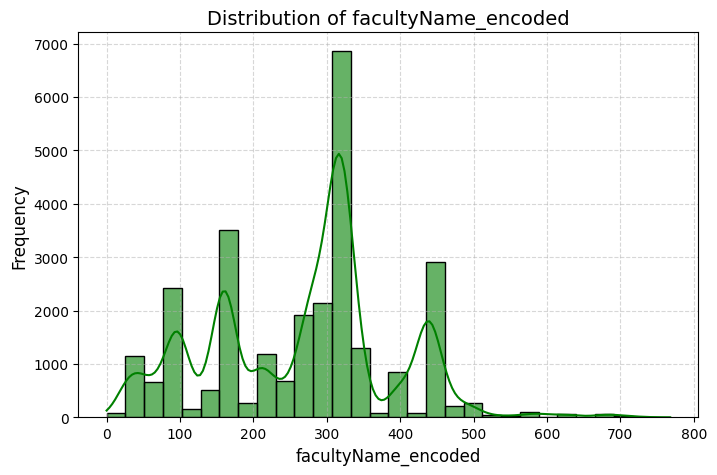

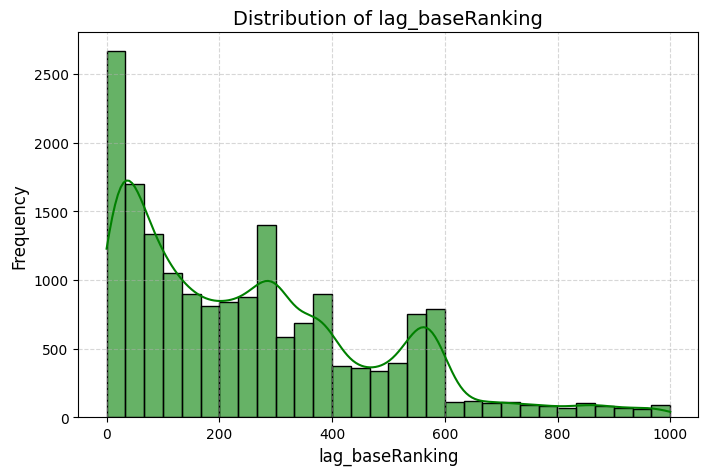

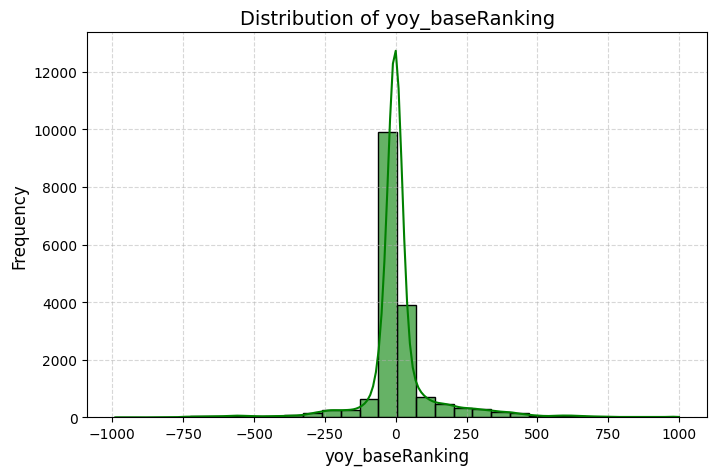

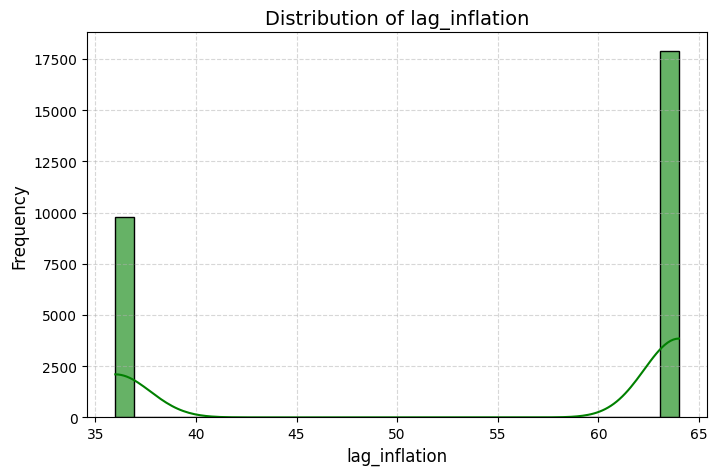

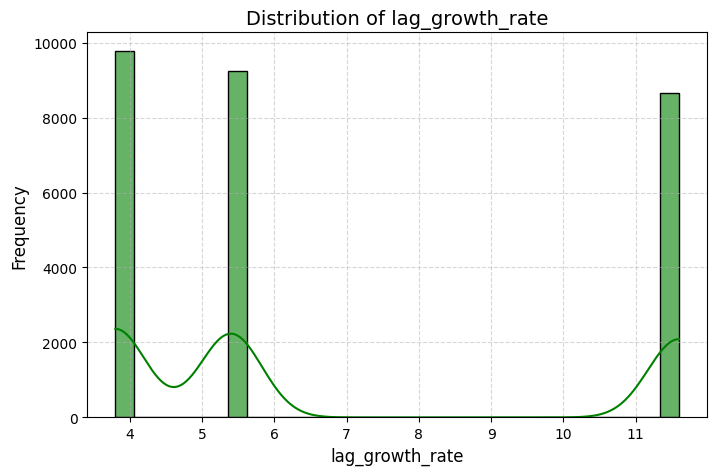

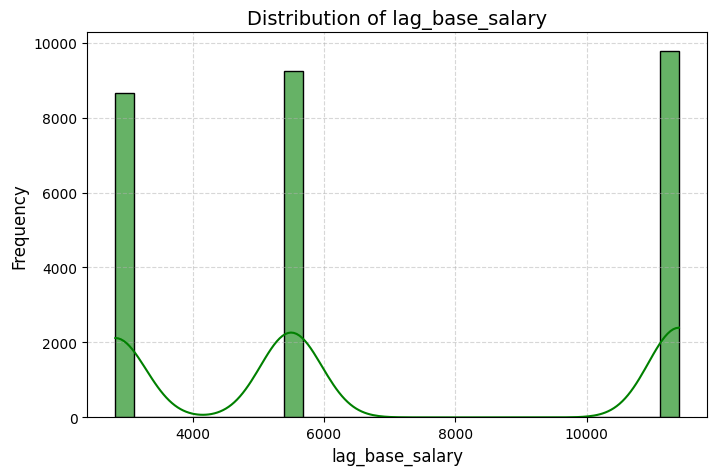

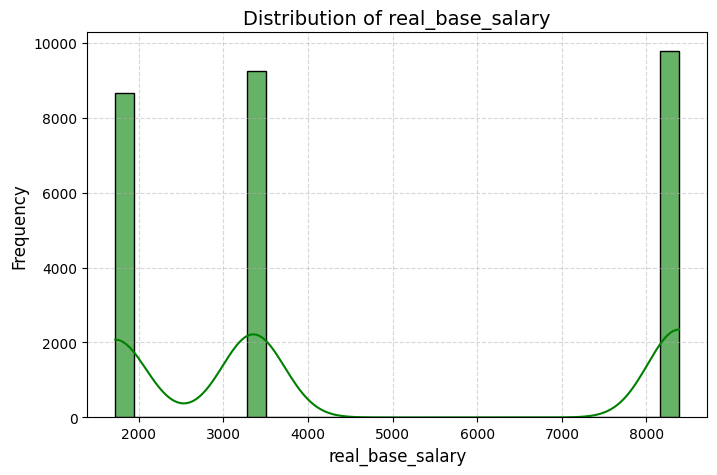

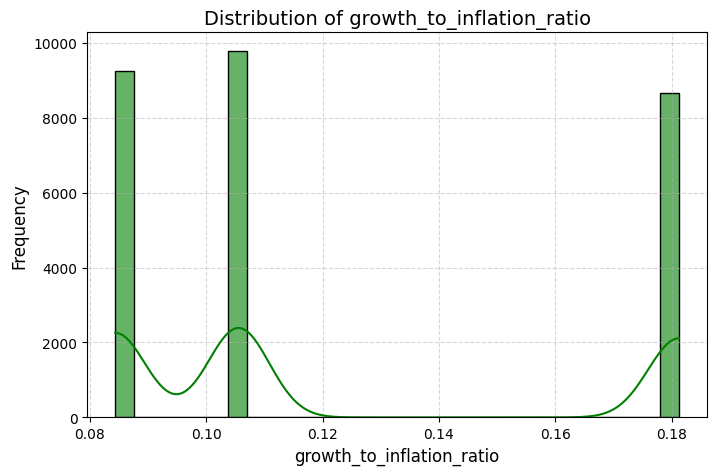

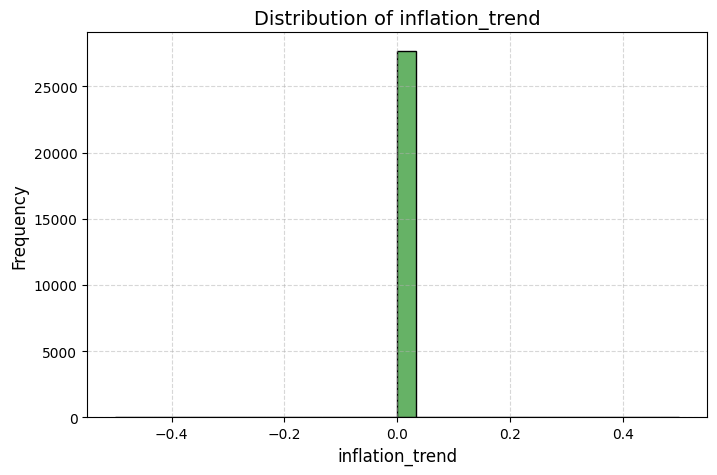

In [115]:
def plot_continuous_features(df, features):
    for feature in features:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[feature], kde=True, bins=30, color='green', alpha=0.6)
        plt.title(f'Distribution of {feature}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()

plot_continuous_features(df, continuous_features)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer


# Define transformations
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_robust = RobustScaler()
encoder = OneHotEncoder(handle_unknown='ignore')

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        # Numerical features (standard scaling)
        ('num', scaler_standard, continuous_features),
        
        # Skewed features (log transformation + standard scaling)
        ('skewed', Pipeline(steps=[
            ('log', FunctionTransformer(np.log1p, validate=True)),
            ('scaler', scaler_standard)
        ]), skew_features),
    ]
)

# Add a small constant to skewed features to avoid -inf values
df[skew_features] = df[skew_features] + 0.1

processed_data = preprocessor.fit_transform(df)

processed_df = pd.DataFrame(processed_data, columns=continuous_features + skew_features)

print(processed_df[numeric_features].describe().round(3))



ValueError: Input X contains NaN.
FunctionTransformer does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [22]:
print(df.isnull().sum())

academicYear                 0
idOSYM                       0
scholarshipRate              0
quota                        0
occupiedSlots                0
                            ..
real_tuition_fee             0
real_base_salary             0
tuition_to_salary_ratio      0
growth_to_inflation_ratio    0
inflation_trend              0
Length: 81, dtype: int64


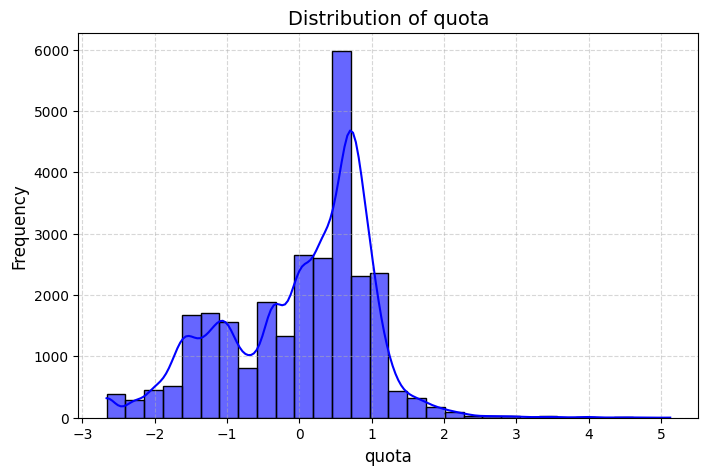

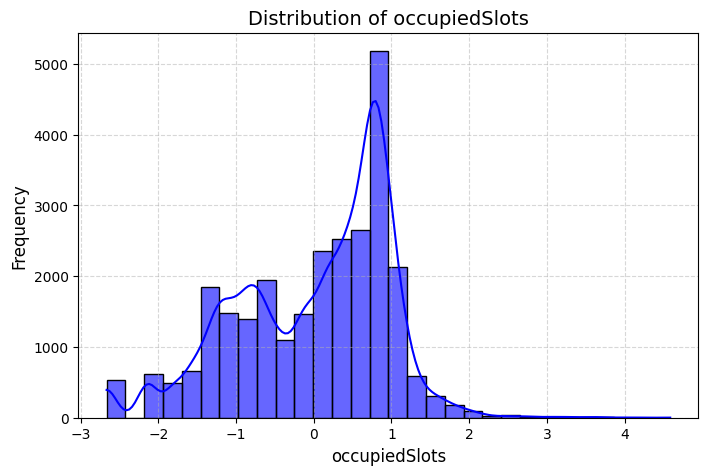

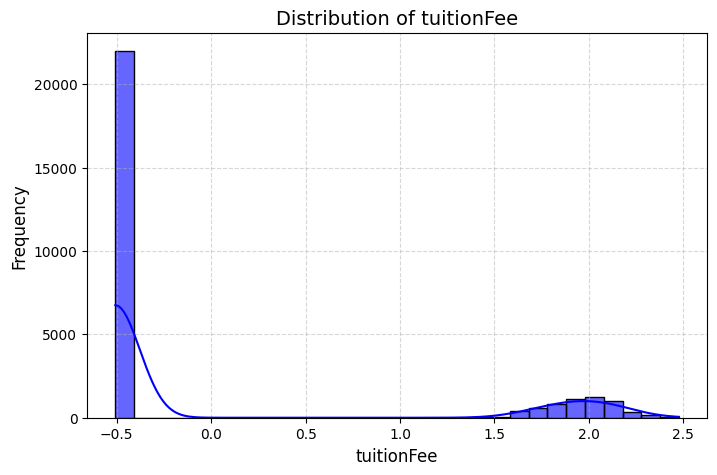

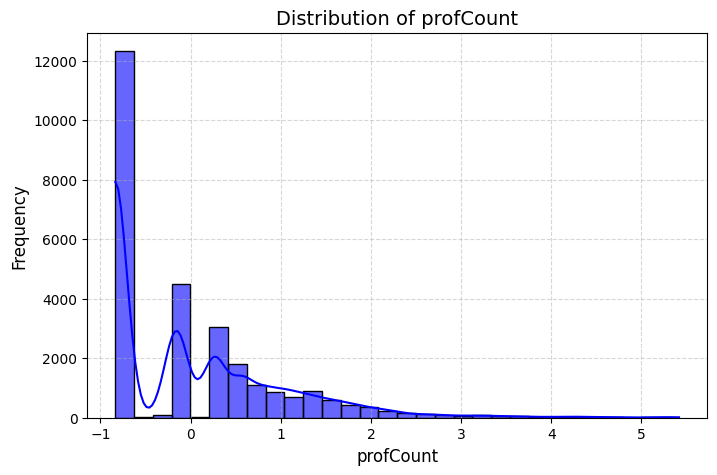

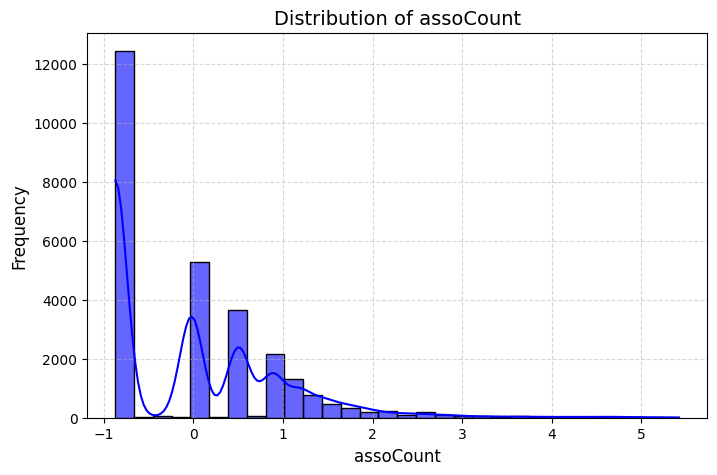

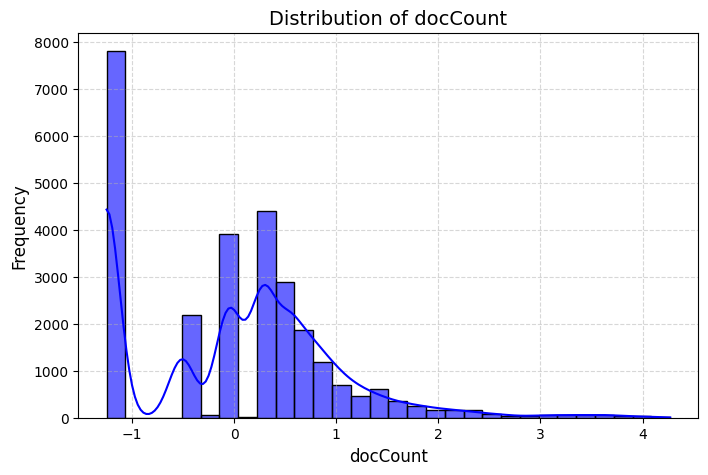

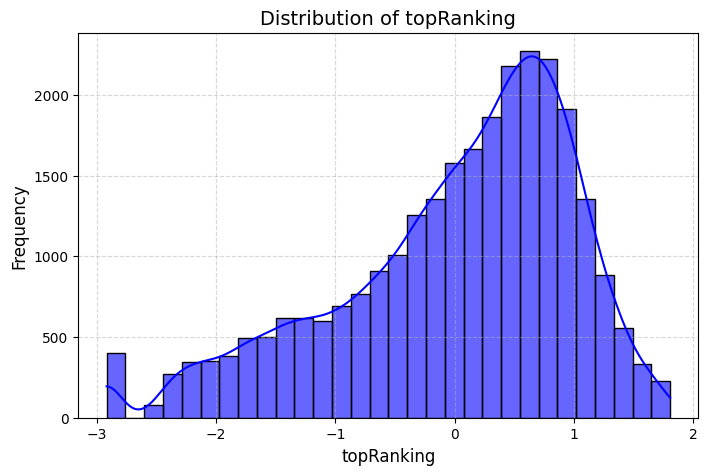

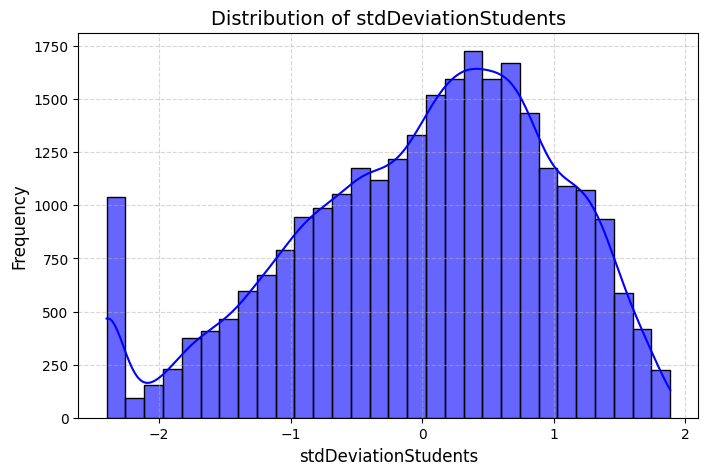

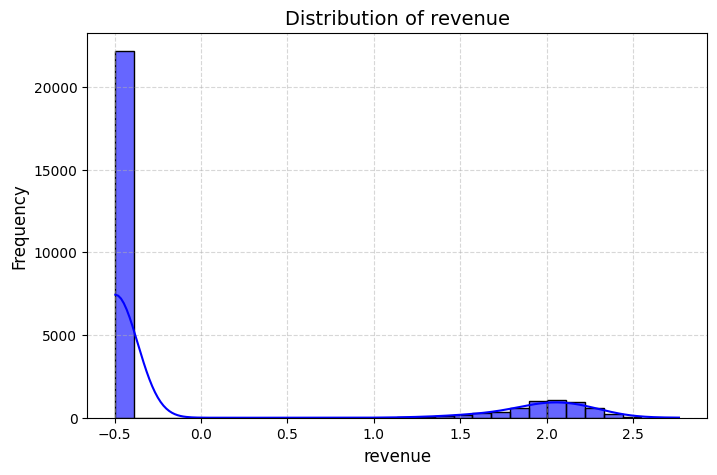

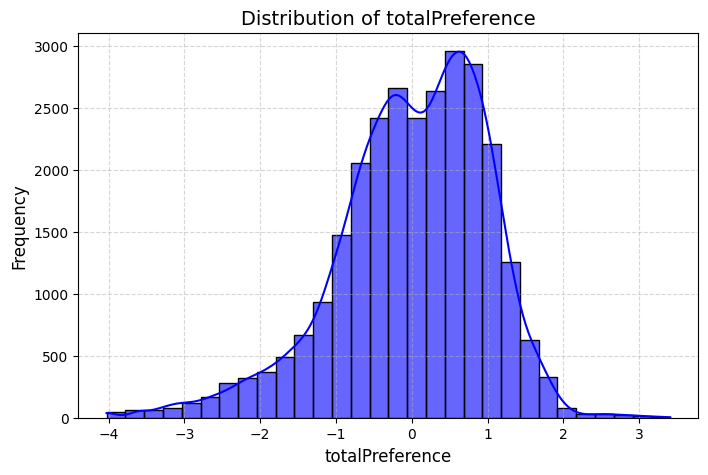

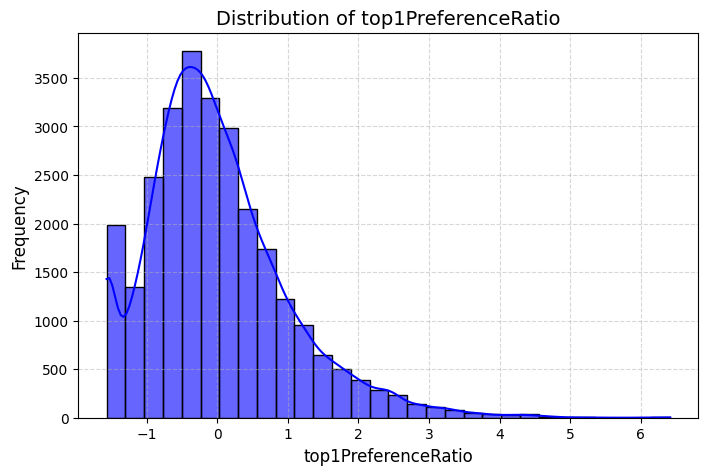

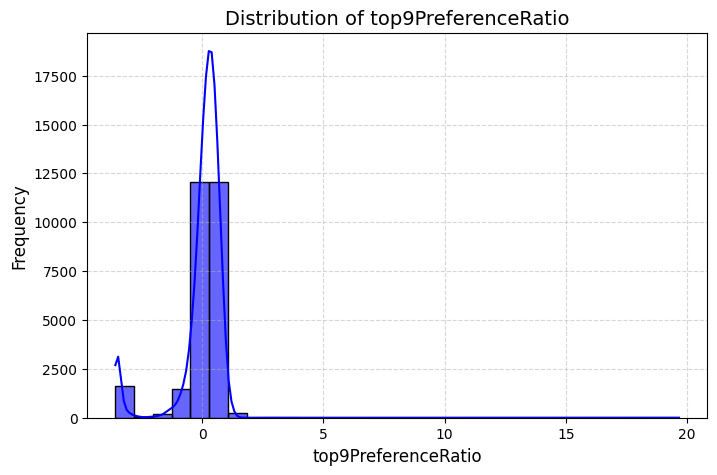

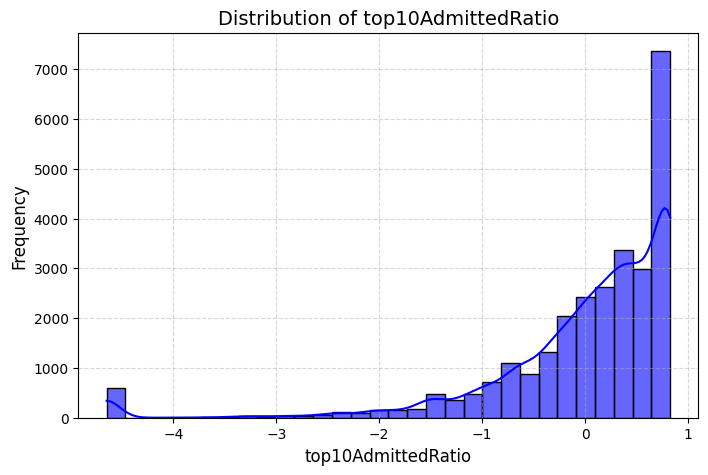

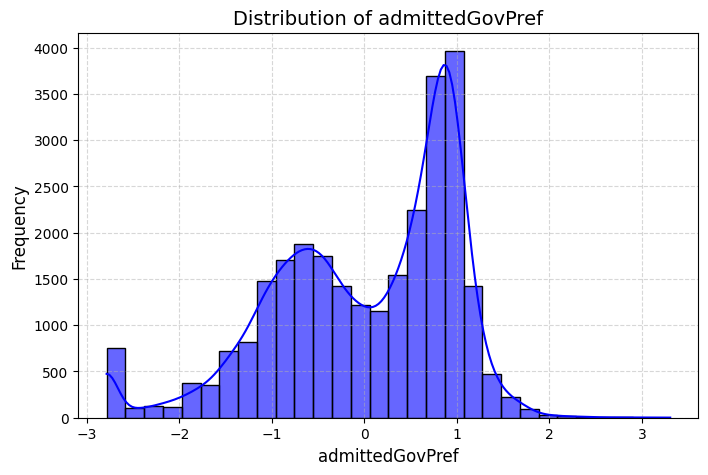

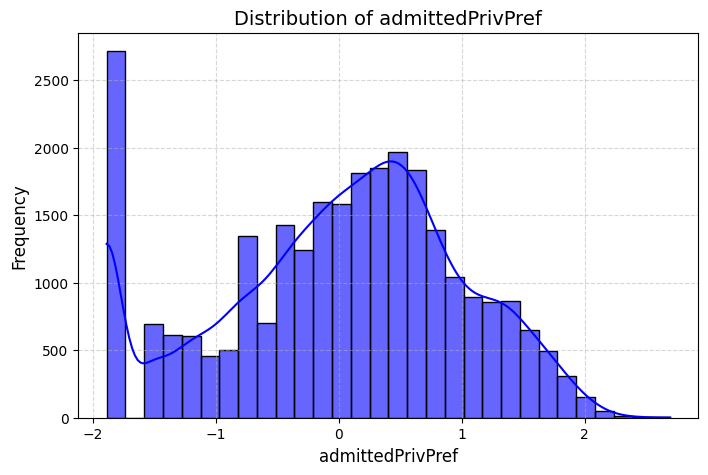

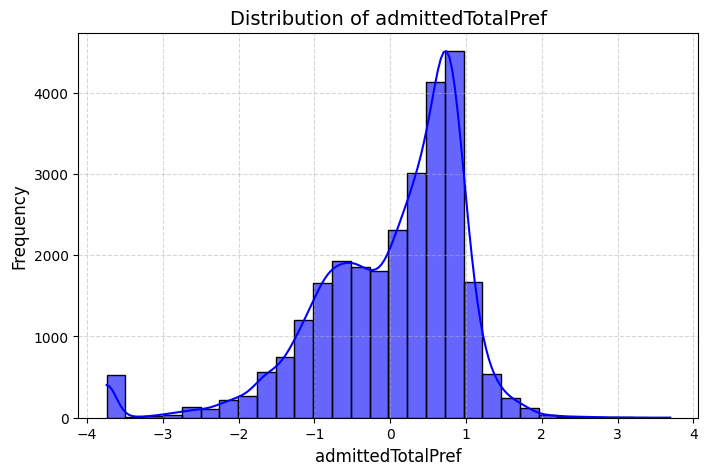

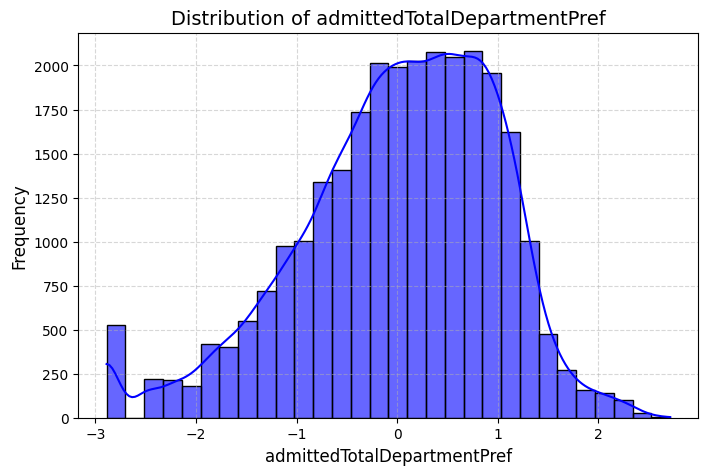

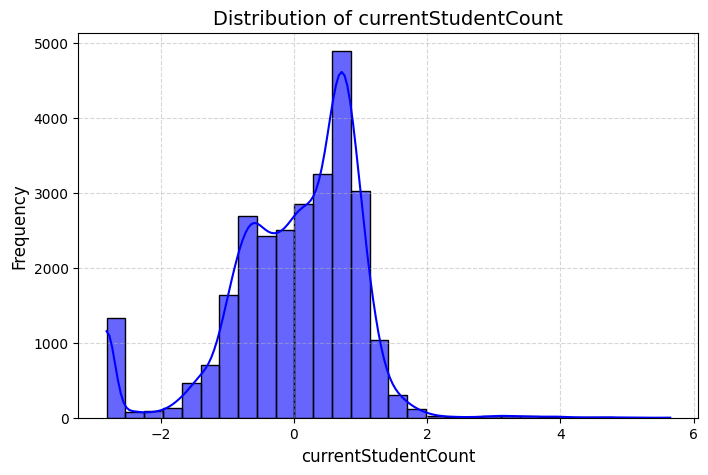

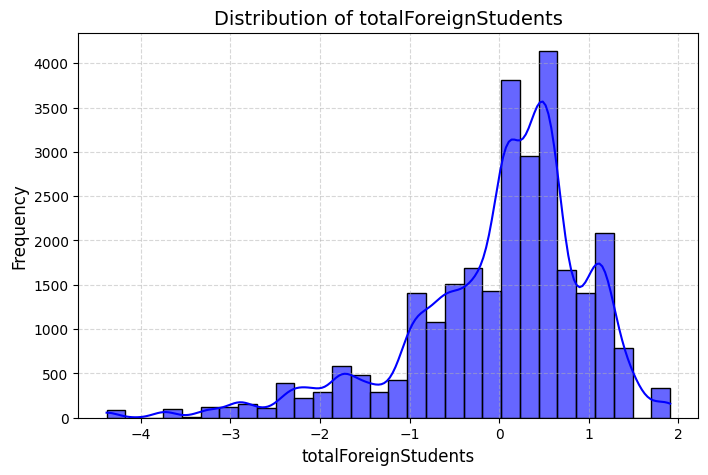

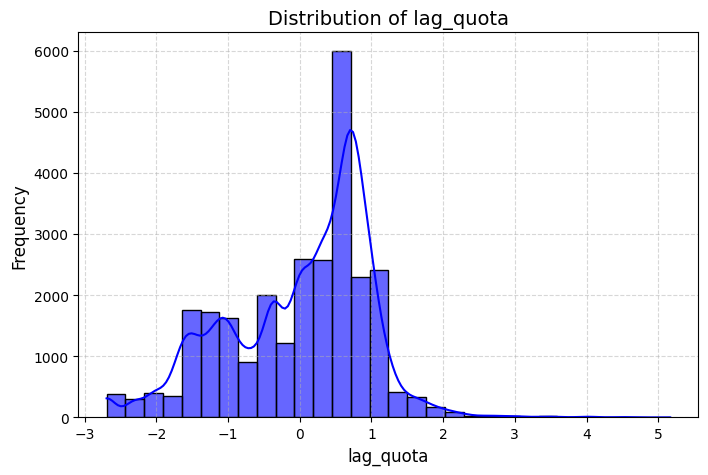

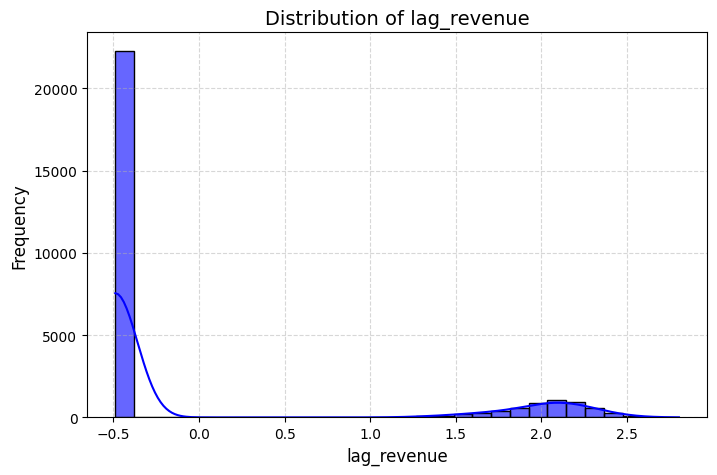

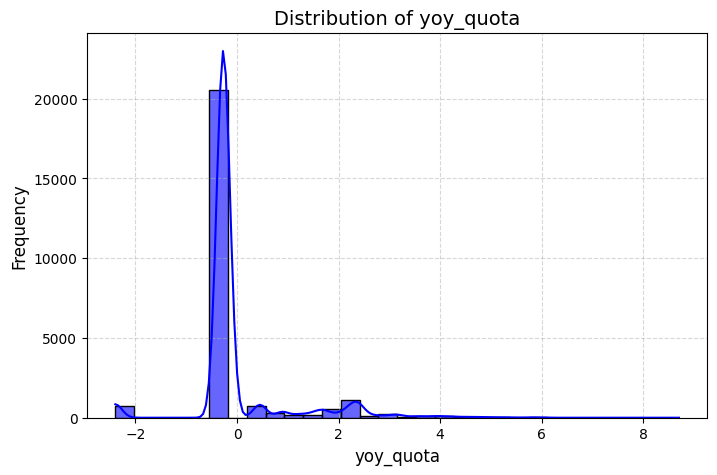

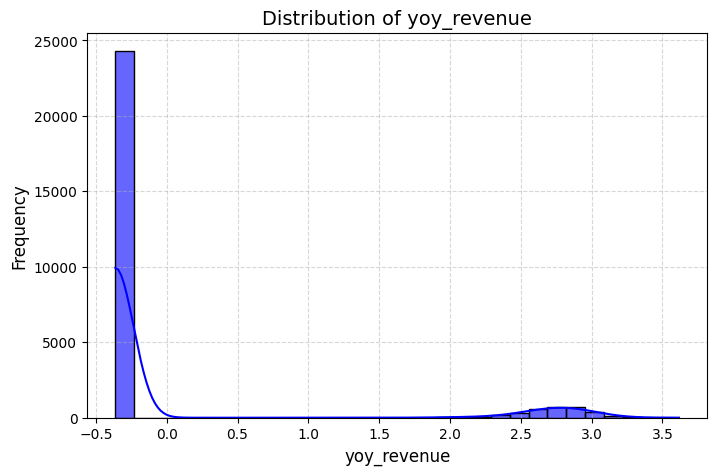

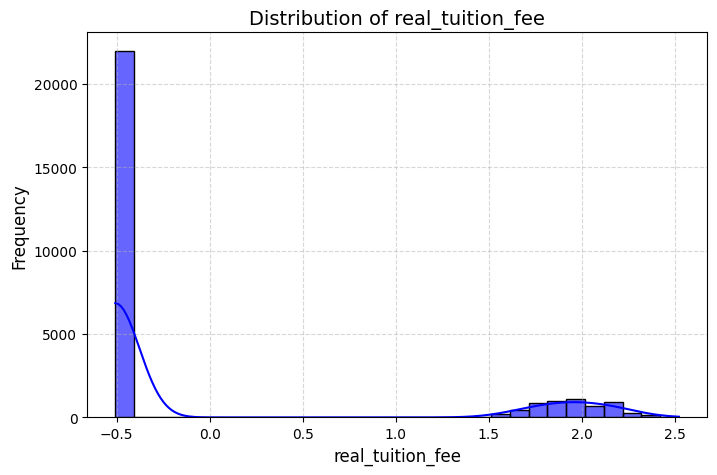

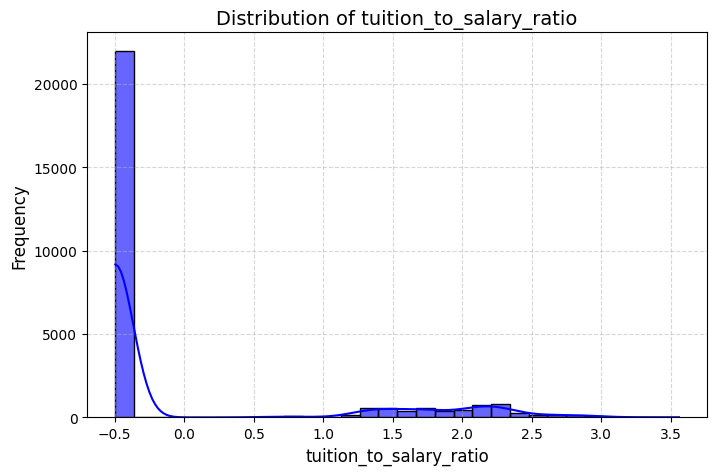

In [41]:
plot_skewed_features(processed_df, skew_features)

In [42]:

# Split data by academic year
df_2021 = df[df['academicYear'] == 2021]
df_2022 = df[df['academicYear'] == 2022]

# Filter rows based on common IDs
common_ids = set(df_2021['idOSYM']).intersection(set(df_2022['idOSYM']))

df_2021_filtered = df_2021[df_2021['idOSYM'].isin(common_ids)].sort_values(by='idOSYM')
df_2022_filtered = df_2022[df_2022['idOSYM'].isin(common_ids)].sort_values(by='idOSYM')

# Prepare X and y
X = df_2021_filtered.drop(columns=['academicYear', 'idOSYM'])
y = df_2022_filtered['baseRanking']

# Check for missing values
print("Missing values in X:", X.isnull().sum().sum())
print("Missing values in y:", y.isnull().sum())

# Display shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Missing values in X: 0
Missing values in y: 0
Shape of X: (8632, 78)
Shape of y: (8632,)


In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

def build_pipeline_random():
    pipeline = Pipeline([
        ('model', RandomForestRegressor(random_state=42))
    ])
    return pipeline

def build_pipeline_linear():
    pipeline = Pipeline([
        ('model', LinearRegression())
    ])
    return pipeline


In [64]:
from sklearn.model_selection import GridSearchCV

def tune_hyperparameters(pipeline, X_train, y_train):
    param_grid = {
        'model__n_estimators': [100, 200],
        'model__max_depth': [20, 30],
        'model__min_samples_split': [5, 10]
    }
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_


In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model Metrics:\nRMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")
    return y_pred


## Baseline Model

In [60]:
from sklearn.model_selection import train_test_split

X_train_2021, X_test_2021, y_train_2022, y_test_2022 = train_test_split(X, y, test_size=0.2, random_state=42)


base_model = LinearRegression()
base_model.fit(X_train_2021, y_train_2022)

y_pred_base = base_model.predict(X_test_2021)

evaluate_model(base_model, X_test_2021, y_test_2022)



Model Metrics:
RMSE: 113.5014, MAE: 70.0374, R^2: 0.7753


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(np.float64(113.50138560627715),
 np.float64(70.0374320446872),
 0.775280576562275,
 array([171.70684568, 508.46444754,  14.85403658, ...,   1.55142967,
        200.40812793,   3.45312049]))

In [61]:

# Train a Random Forest model
complex_model = RandomForestRegressor(random_state=42, n_estimators=100)
complex_model.fit(X_train_2021, y_train_2022)
# Predict on test data
y_pred_complex = complex_model.predict(X_test_2021)
# Calculate metrics
evaluate_model(complex_model, X_test_2021, y_test_2022)


Model Metrics:
RMSE: 98.3482, MAE: 47.9266, R^2: 0.8313


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(np.float64(98.34819385975689),
 np.float64(47.92660805178029),
 0.8312782534404761,
 array([119.20183, 479.35174,  16.72634, ...,   4.37751, 194.12638,
         18.03575]))

## Fine-Tune Model

In [68]:
# Train a Random Forest model
pipeline_random = build_pipeline_random()
pipeline_random, best_params_random = tune_hyperparameters(pipeline_random, X_train_2021, y_train_2022)
print("Best Hyperparameters (Random Forest):", best_params_random)
y_pred_2022 = evaluate_model(pipeline_random, X_test_2021, y_test_2022)

Best Hyperparameters (Random Forest): {'model__max_depth': 20, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Model Metrics:
RMSE: 98.0738, MAE: 47.6259, R^2: 0.8322


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Visualize

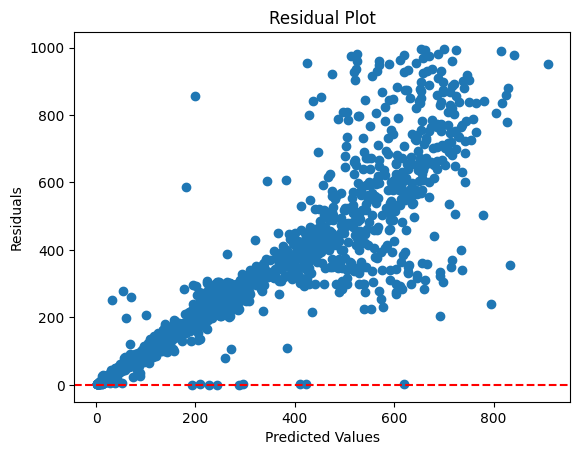

In [104]:
# Residual plot
import matplotlib.pyplot as plt
def plot_residuals(y_test, y_pred):
    residuals = y_test 
    plt.scatter(y_pred, residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.show()

plot_residuals(y_test_2022, y_pred_2022)

In [ ]:

# Split data for 2022 and 2023
df_2022 = df[df['academicYear'] == 2022]
df_2023 = df[df['academicYear'] == 2023]

# Filter rows based on common IDs between 2022 and 2023
common_ids_2022_2023 = set(df_2022['idOSYM']).intersection(set(df_2023['idOSYM']))

df_2022_filtered = df_2022[df_2022['idOSYM'].isin(common_ids_2022_2023)].sort_values(by='idOSYM')
df_2023_filtered = df_2023[df_2023['idOSYM'].isin(common_ids_2022_2023)].sort_values(by='idOSYM')

print("Shape of 2022 data:", df_2022_filtered.shape)
print("Shape of 2023 data:", df_2023_filtered.shape)

# Prepare X_2022 and y_2023
X_2022 = df_2022_filtered.drop(columns=['baseRanking', 'academicYear', 'idOSYM'])
y_2023 = df_2023_filtered['baseRanking']

X_train_2022, X_test_2022, y_train_2023, y_test_2023 = train_test_split(X_2022, y_2023, test_size=0.2, random_state=42)


Shape of 2022 data: (8991, 81)
Shape of 2023 data: (8991, 81)


In [71]:
# Train a Random Forest model
pipeline_random, best_params_random_2022 = tune_hyperparameters(pipeline_random, X_train_2022, y_train_2023)
print("Best Hyperparameters (Random Forest):", best_params_random_2022)
y_pred_2023 = evaluate_model(pipeline_random, X_test_2022, y_test_2023)

Best Hyperparameters (Random Forest): {'model__max_depth': 30, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Model Metrics:
RMSE: 111.1965, MAE: 52.9995, R^2: 0.7958


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


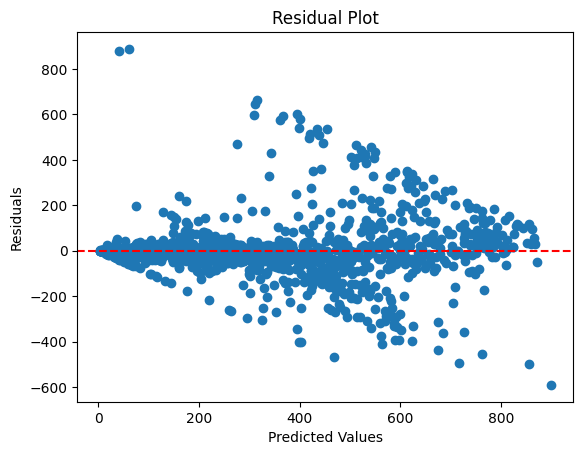

In [73]:
plot_residuals(y_test_2023, y_pred_2023)

## Feature Selection 2022 Prediction

In [74]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model_feature = RandomForestRegressor(random_state=42)
model_feature.fit(X_train, y_train)

# Get feature importance
feature_importances = model_feature.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

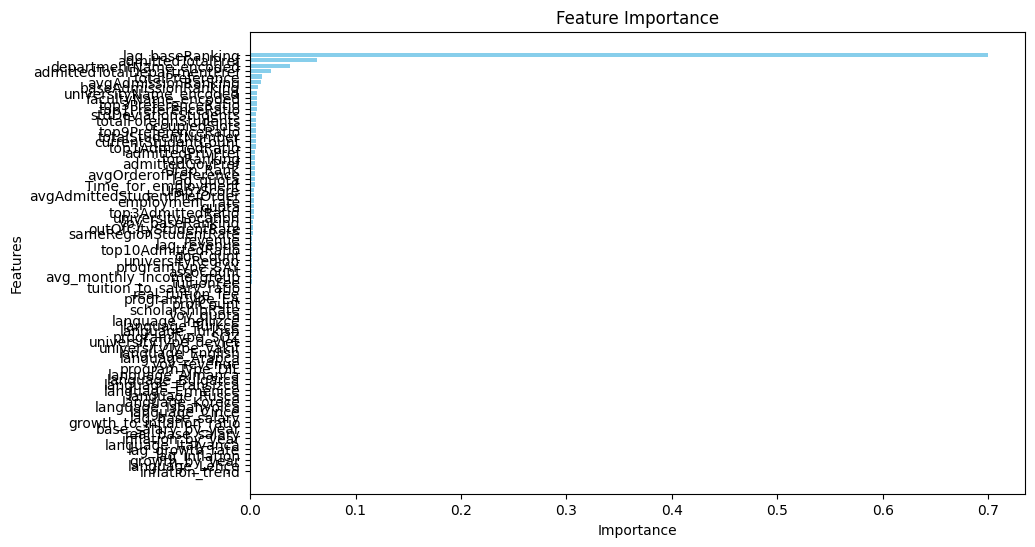

                        Feature  Importance
64              lag_baseRanking    0.700030
25            admittedTotalPref    0.063587
62       departmentName_encoded    0.037913
26  admittedTotalDepartmentPref    0.019327
14              totalPreference    0.011423
38          avgAdmissionRanking    0.010706
39         baseAdmissionRanking    0.007902
61       universityName_encoded    0.006778
63          facultyName_encoded    0.006475
16          top3PreferenceRatio    0.006387


In [75]:

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()

# Print top 30 most important features
print(importance_df.head(10))

In [ ]:
## Use most important features


# Split data by academic year
df_2021 = df[df['academicYear'] == 2021]
df_2022 = df[df['academicYear'] == 2022]

# Filter rows based on common IDs
common_ids = set(df_2021['idOSYM']).intersection(set(df_2022['idOSYM']))

df_2021_filtered = df_2021[df_2021['idOSYM'].isin(common_ids)].sort_values(by='idOSYM')
df_2022_filtered = df_2022[df_2022['idOSYM'].isin(common_ids)].sort_values(by='idOSYM')

# Select the top 30 features
top_features = importance_df['Feature'][:30].tolist()

# Filter the dataset to include only the top features
df_2021_filtered_top = df_2021_filtered[top_features]

# Prepare X and y
X = df_2021_filtered_top
y = df_2022_filtered['baseRanking']

# Check for missing values
print("Missing values in X:", X.isnull().sum().sum())
print("Missing values in y:", y.isnull().sum())

# Display shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)



Missing values in X: 0
Missing values in y: 0
Shape of X: (8632, 30)
Shape of y: (8632,)


In [86]:
# Split data for training and testing
X_train_2021_top, X_test_2021_top, y_train_2022_top, y_test_2022_top = train_test_split(X, y, test_size=0.2, random_state=42)
# Trin a Random Forest model with top features
pipeline_random_top = build_pipeline_random()
pipeline_random_top, best_params_random_top = tune_hyperparameters(pipeline_random_top, X_train_2021_top, y_train_2022_top)
print("Best Hyperparameters (Random Forest):", best_params_random_top)
y_pred_2022_top = evaluate_model(pipeline_random_top, X_test_2021_top, y_test_2022_top)


Best Hyperparameters (Random Forest): {'model__max_depth': 30, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Model Metrics:
RMSE: 99.5708, MAE: 48.9108, R^2: 0.8271


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## PCA

In [95]:
# Aplly PCA to reduce the dimensionality of the dataset
from sklearn.decomposition import PCA
# Define a function to reduce components based on 90% variance threshold
def reduce_pca_components(feature_set, variance_threshold=0.98):
    pca = PCA()
    reduced_pca = pca.fit_transform(feature_set)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(cumulative_variance >= variance_threshold) + 1
    print(f"Number of components to explain {variance_threshold*100}% variance: {n_components}")
    return pca.transform(feature_set)[:, :n_components], pca , n_components



In [102]:

# Split data by academic year
df_2021_pca = df[df['academicYear'] == 2021]
print(df_2021.shape)


(8656, 81)


In [103]:
X_pca, pca, n_components = reduce_pca_components(df_2021)
print("Shape of X after PCA:", X_pca.shape)

Number of components to explain 98.0% variance: 1
Shape of X after PCA: (8656, 1)
